In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def smooth(a, eps=0.01):
    b = [a[0]]
    for e in a[1:]:
        b.append(b[-1] * (1 - eps) + e * eps)
    return b

In [18]:
def plot_norms(
        grad_norms_array: str, 
        hess_norms_array: str, 
        title: str,
        M_constant: float = 1,
        plot_with_percentiles: bool = True,
        logscale: bool = False,
        do_smooth: bool =True,
    ):

    loaded_grad_norms_arr = np.load(grad_norms_array)
    loaded_hess_hutch_norm_diffs_arr = np.load(hess_norms_array)

    if do_smooth:
        loaded_grad_norms_arr = [smooth(l) for l in list(loaded_grad_norms_arr)]
        loaded_hess_hutch_norm_diffs_arr = [smooth(l) for l in list(loaded_hess_hutch_norm_diffs_arr)]

    plot_grad_norms_arr = np.sqrt(loaded_grad_norms_arr)
    plot_hess_hutch_norm_diffs_arr = M_constant * np.array(loaded_hess_hutch_norm_diffs_arr)

    gradp50 = np.percentile(plot_grad_norms_arr, 50, axis=0)
    hessp50 = np.percentile(plot_hess_hutch_norm_diffs_arr, 50, axis=0)

    plt.figure(figsize=(16, 8) ,dpi=150)

    if logscale:
        if plot_with_percentiles:
            gradp10 = np.percentile(plot_grad_norms_arr, 10, axis=0)
            gradp90 = np.percentile(plot_grad_norms_arr, 90, axis=0)
            hessp10 = np.percentile(plot_hess_hutch_norm_diffs_arr, 10, axis=0)
            hessp90 = np.percentile(plot_hess_hutch_norm_diffs_arr, 90, axis=0)

            plt.loglog(gradp50, label=r'$\|\nabla f\|^{1/2}$', color='b', linewidth=0.5)
            plt.fill_between(range(len(loaded_grad_norms_arr[0])), gradp10, gradp90, color='b', alpha=0.2)

            plt.loglog(hessp50, label=r'$\| H - \nabla^2 f\|$', color='g', linewidth=0.5)
            plt.fill_between(range(len(loaded_grad_norms_arr[0])), hessp10, hessp90, color='g', alpha=0.2)
        else:
            plt.loglog(gradp50, label=r'$\|\nabla f\|^{1/2}$', color='b', linewidth=0.5)
            plt.loglog(hessp50, label=r'$\| H - \nabla^2 f\|$', color='g', linewidth=0.5)
            
    else:
        if plot_with_percentiles:
            gradp10 = np.percentile(plot_grad_norms_arr, 10, axis=0)
            gradp90 = np.percentile(plot_grad_norms_arr, 90, axis=0)
            hessp10 = np.percentile(plot_hess_hutch_norm_diffs_arr, 10, axis=0)
            hessp90 = np.percentile(plot_hess_hutch_norm_diffs_arr, 90, axis=0)

            plt.plot(gradp50, label=r'$\|\nabla f\|^{1/2}$', color='b', linewidth=0.5)
            plt.fill_between(range(len(loaded_grad_norms_arr[0])), gradp10, gradp90, color='b', alpha=0.2)

            plt.plot(hessp50, label=r'$\| H - \nabla^2 f\|$', color='g', linewidth=0.5)
            plt.fill_between(range(len(loaded_grad_norms_arr[0])), hessp10, hessp90, color='g', alpha=0.2)
        else:
            plt.plot(gradp50, label=r'$\|\nabla f\|^{1/2}$', color='b', linewidth=0.5)
            plt.plot(hessp50, label=r'$\| H - \nabla^2 f\|$', color='g', linewidth=0.5)

    plt.title(title, fontsize=40, fontweight='bold')
    plt.xlabel('Number of Iterations', fontsize=45)
    plt.ylabel('Norm', fontsize=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='best', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

In [19]:
def plot_relative_inexactness(
        grad_norms_array: str, 
        hess_norms_array: str, 
        title: str,
        M_constant: float = 1,
        plot_with_percentiles: bool = True,
        logscale: bool = False,
        do_smooth: bool =True,
    ):
    loaded_grad_norms_arr = np.load(grad_norms_array)
    loaded_hess_hutch_norm_diffs_arr = np.load(hess_norms_array)

    if do_smooth:
        loaded_grad_norms_arr = [smooth(l) for l in list(loaded_grad_norms_arr)]
        loaded_hess_hutch_norm_diffs_arr = [smooth(l) for l in list(loaded_hess_hutch_norm_diffs_arr)]
        
    relative_inexactness = M_constant * np.array(loaded_hess_hutch_norm_diffs_arr) / np.sqrt(loaded_grad_norms_arr)
    p50 = np.percentile(relative_inexactness, 50, axis=0)
    plt.figure(figsize=(16, 8) ,dpi=150)
    
    if plot_with_percentiles == False:
        if logscale:
            plt.loglog(p50, label=r'Relative Inexactness', color='r', linewidth=0.5)
        else:
            plt.plot(p50, label=r'Relative Inexactness', color='r', linewidth=0.5)
    else:
        p10 = np.percentile(relative_inexactness, 10, axis=0)
        p90 = np.percentile(relative_inexactness, 90, axis=0)
        if logscale:
            plt.loglog(p50, label=r'Relative Inexactness', color='r', linewidth=0.5)
        else:
            plt.plot(p50, label=r'Relative Inexactness', color='r', linewidth=0.5)
        plt.fill_between(range(len(loaded_grad_norms_arr[0])), p10, p90, color='r', alpha=0.2)

    plt.title(title, fontsize=40, fontweight='bold')
    plt.xlabel('Number of Iterations', fontsize=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='best', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

Hutchinson

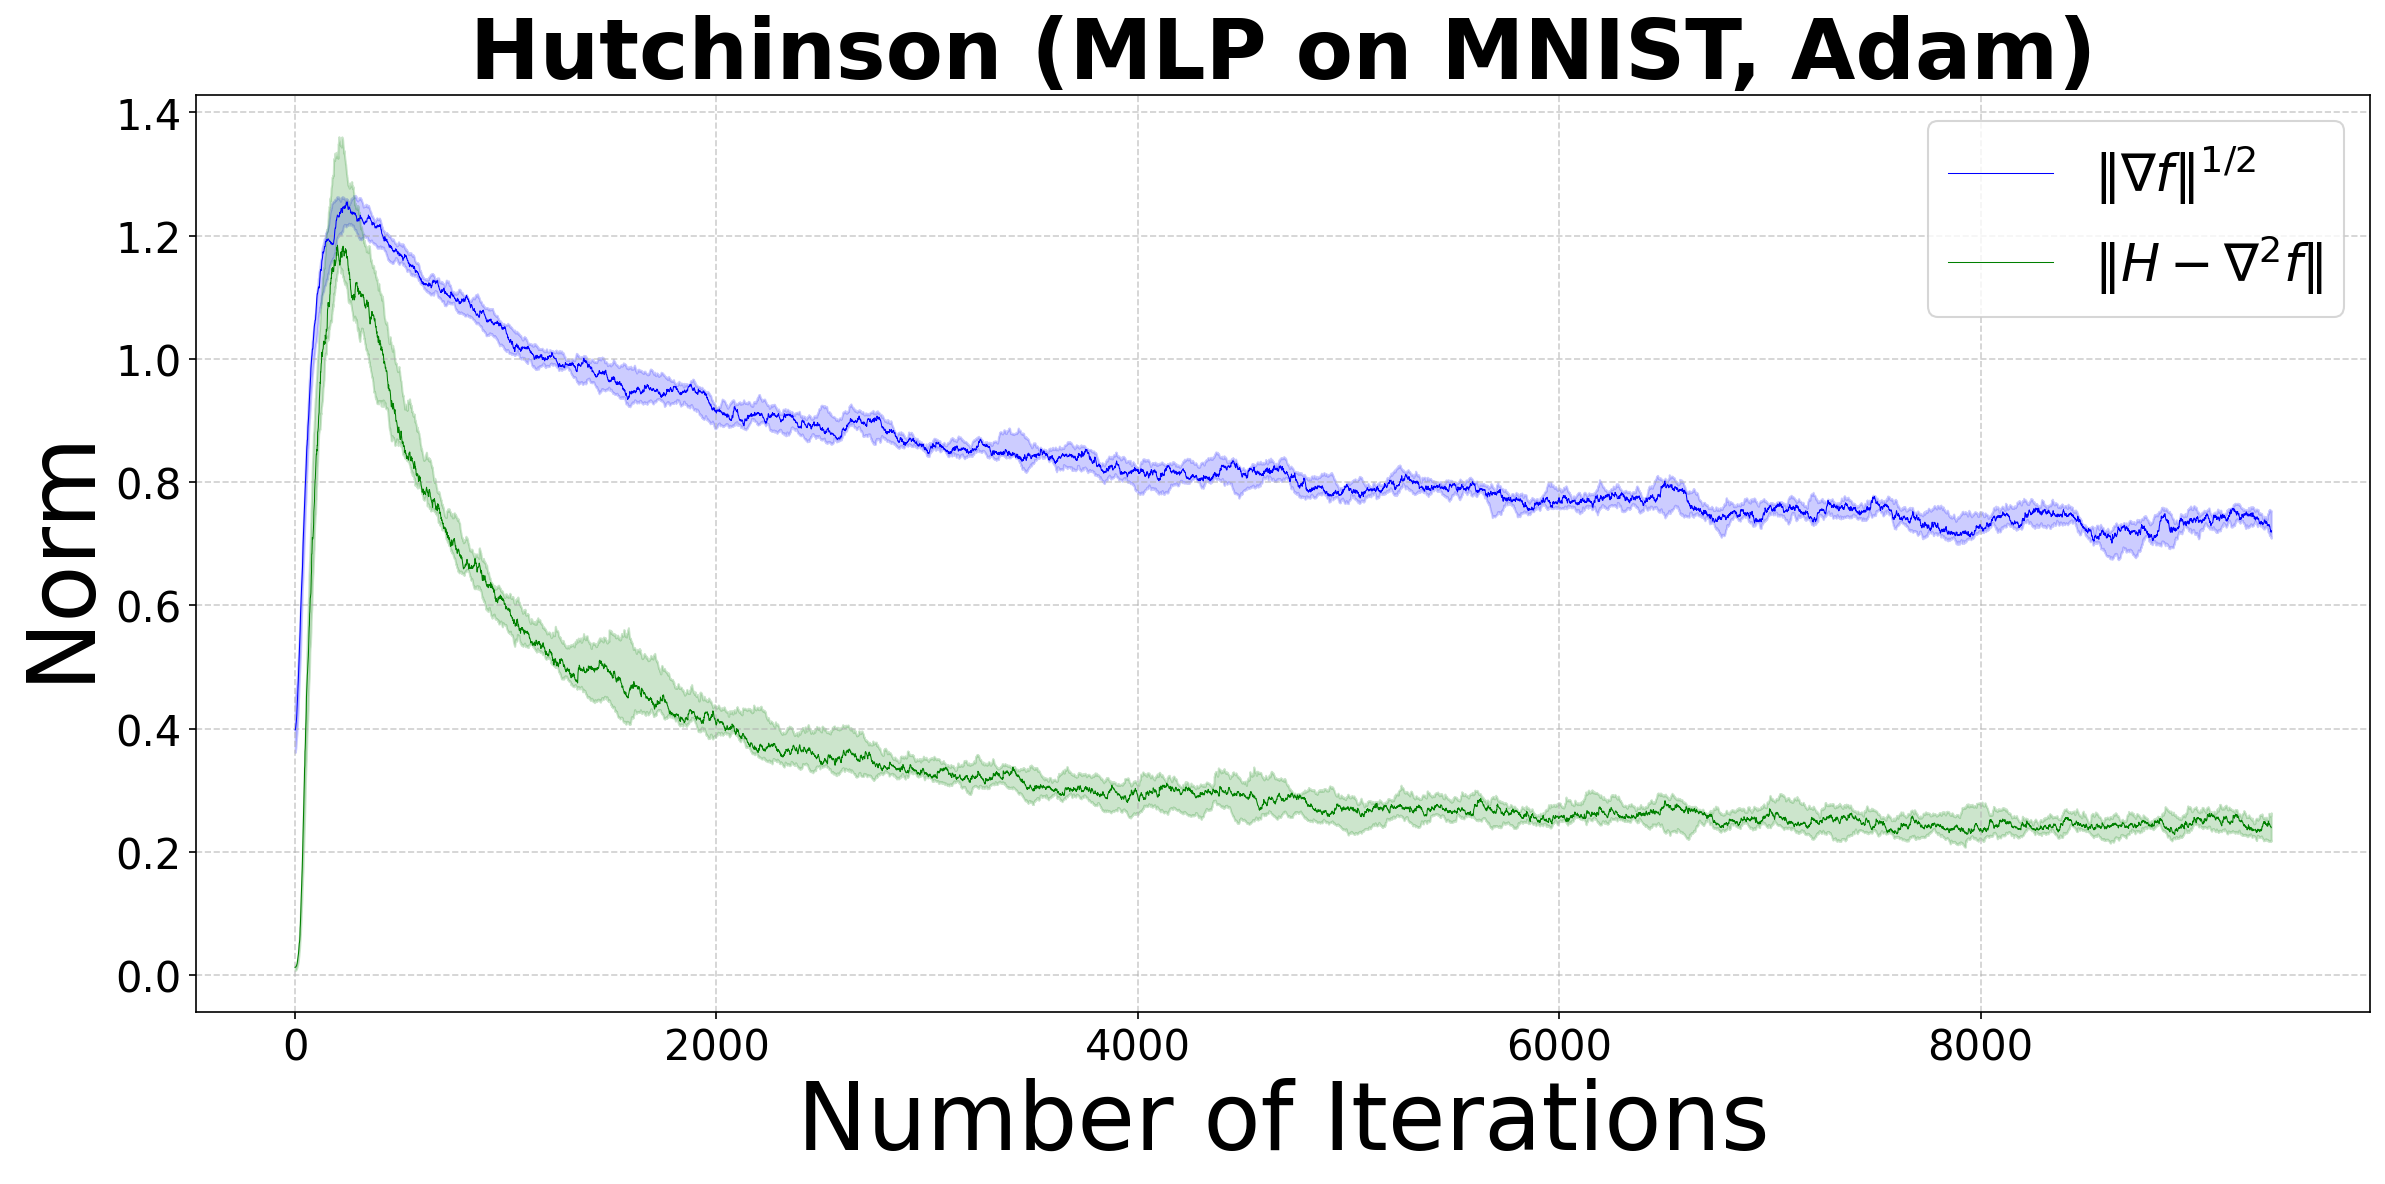

In [46]:
plot_norms(
    'hutch_mnist_mlp_grad_norms.npy', 
    'hutch_mnist_mlp_norms_diff.npy', 
    'Hutchinson (MLP on MNIST, Adam)',
    M_constant=1 / 40, 
    plot_with_percentiles=True,
    logscale=False,
    )

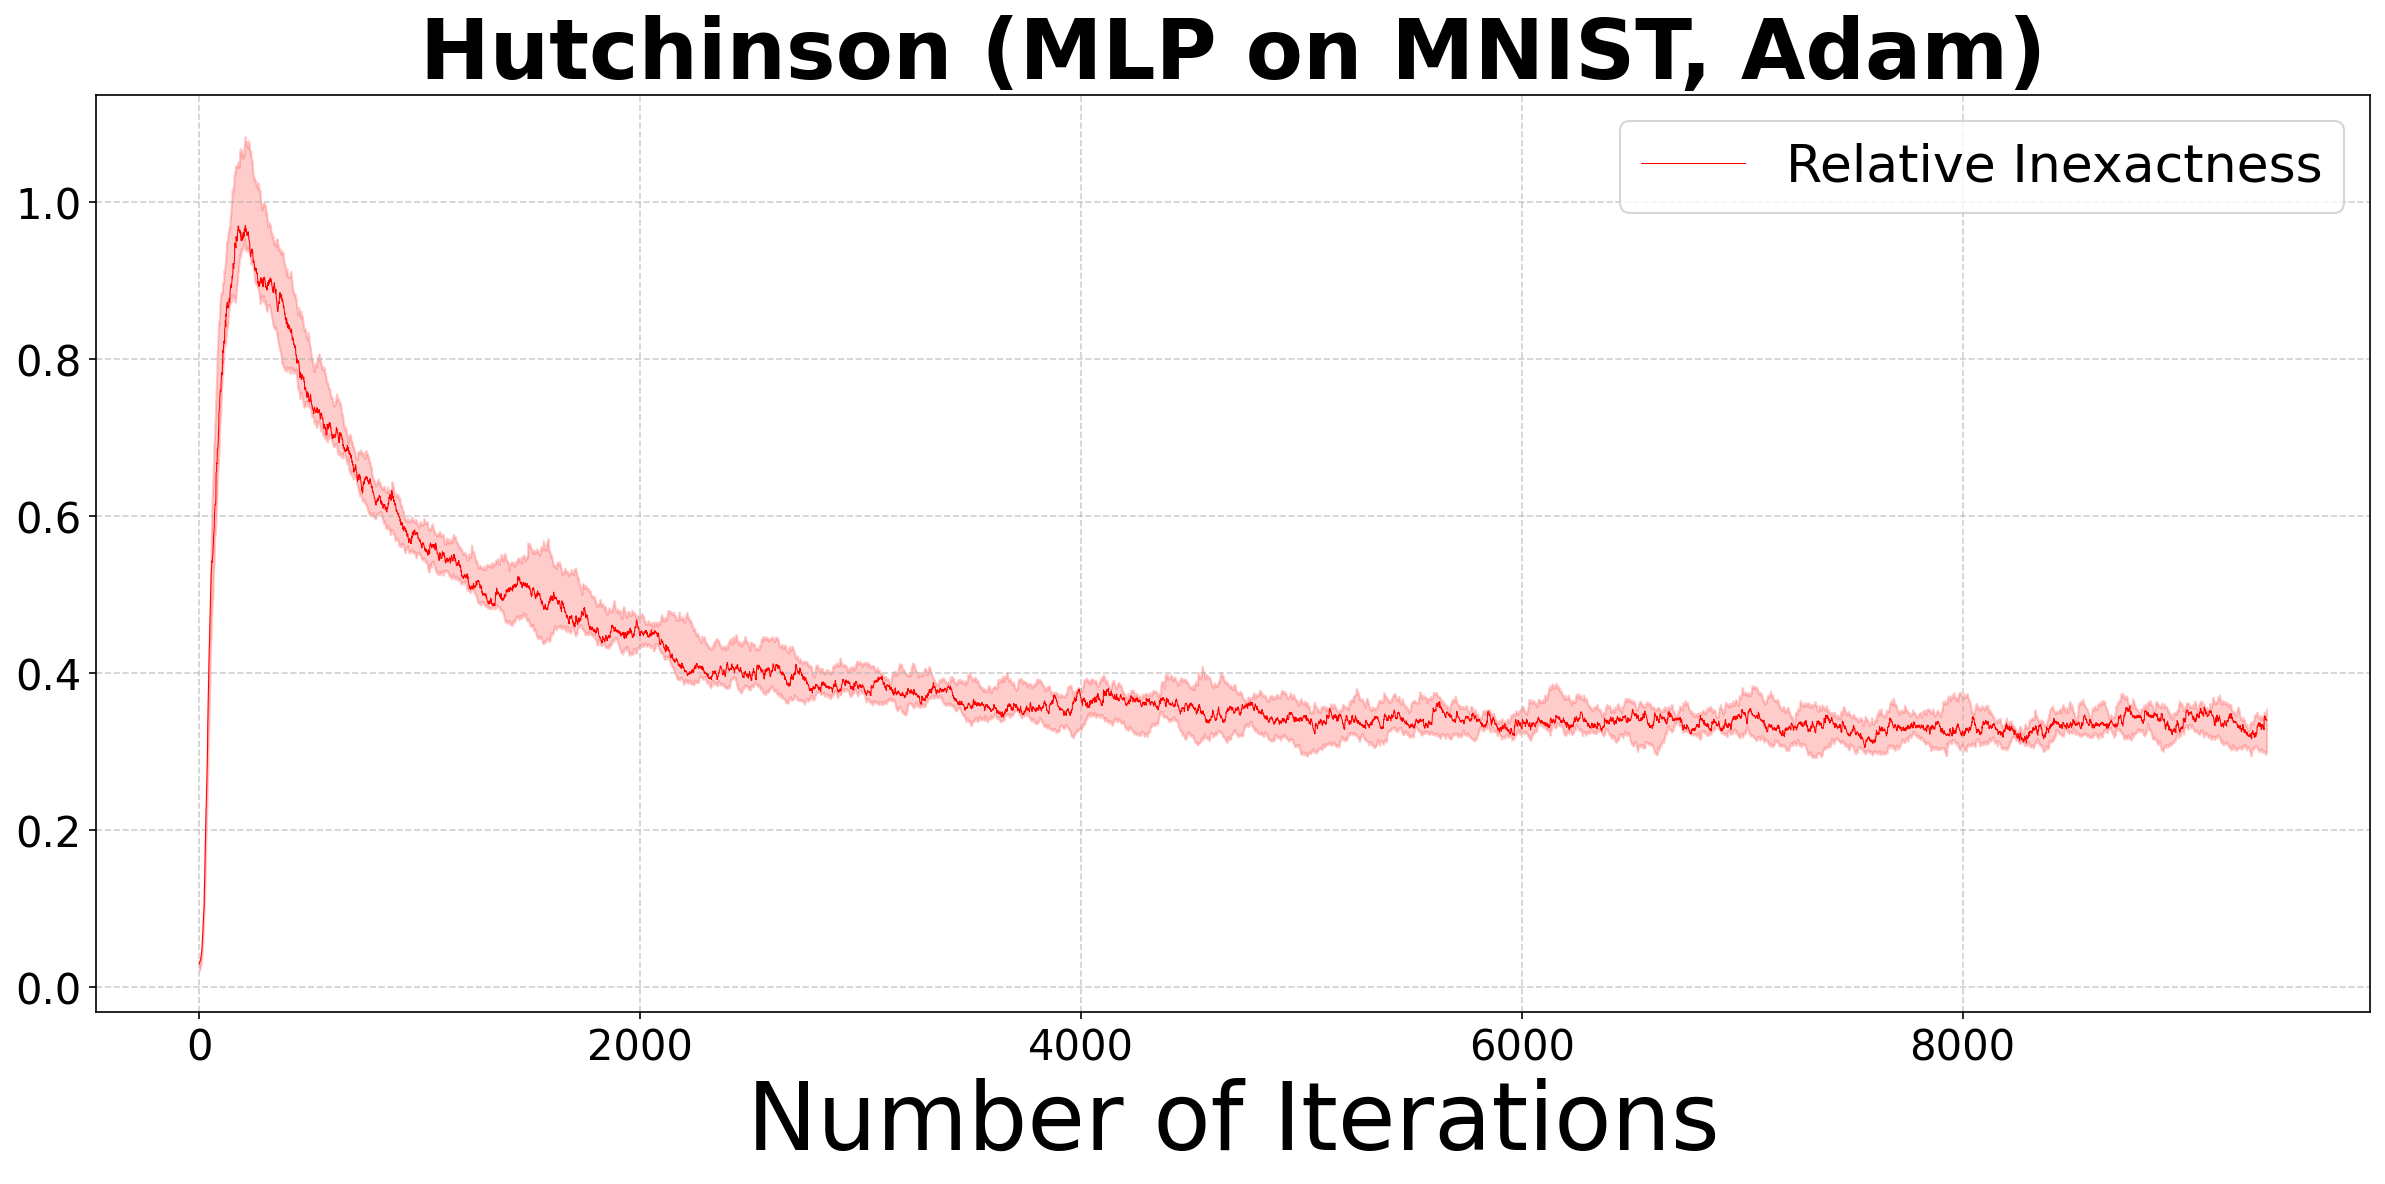

In [47]:
plot_relative_inexactness(
    'hutch_mnist_mlp_grad_norms.npy', 
    'hutch_mnist_mlp_norms_diff.npy', 
    'Hutchinson (MLP on MNIST, Adam)',
    M_constant=1 / 40,
    plot_with_percentiles=True,
    logscale=False,
    )

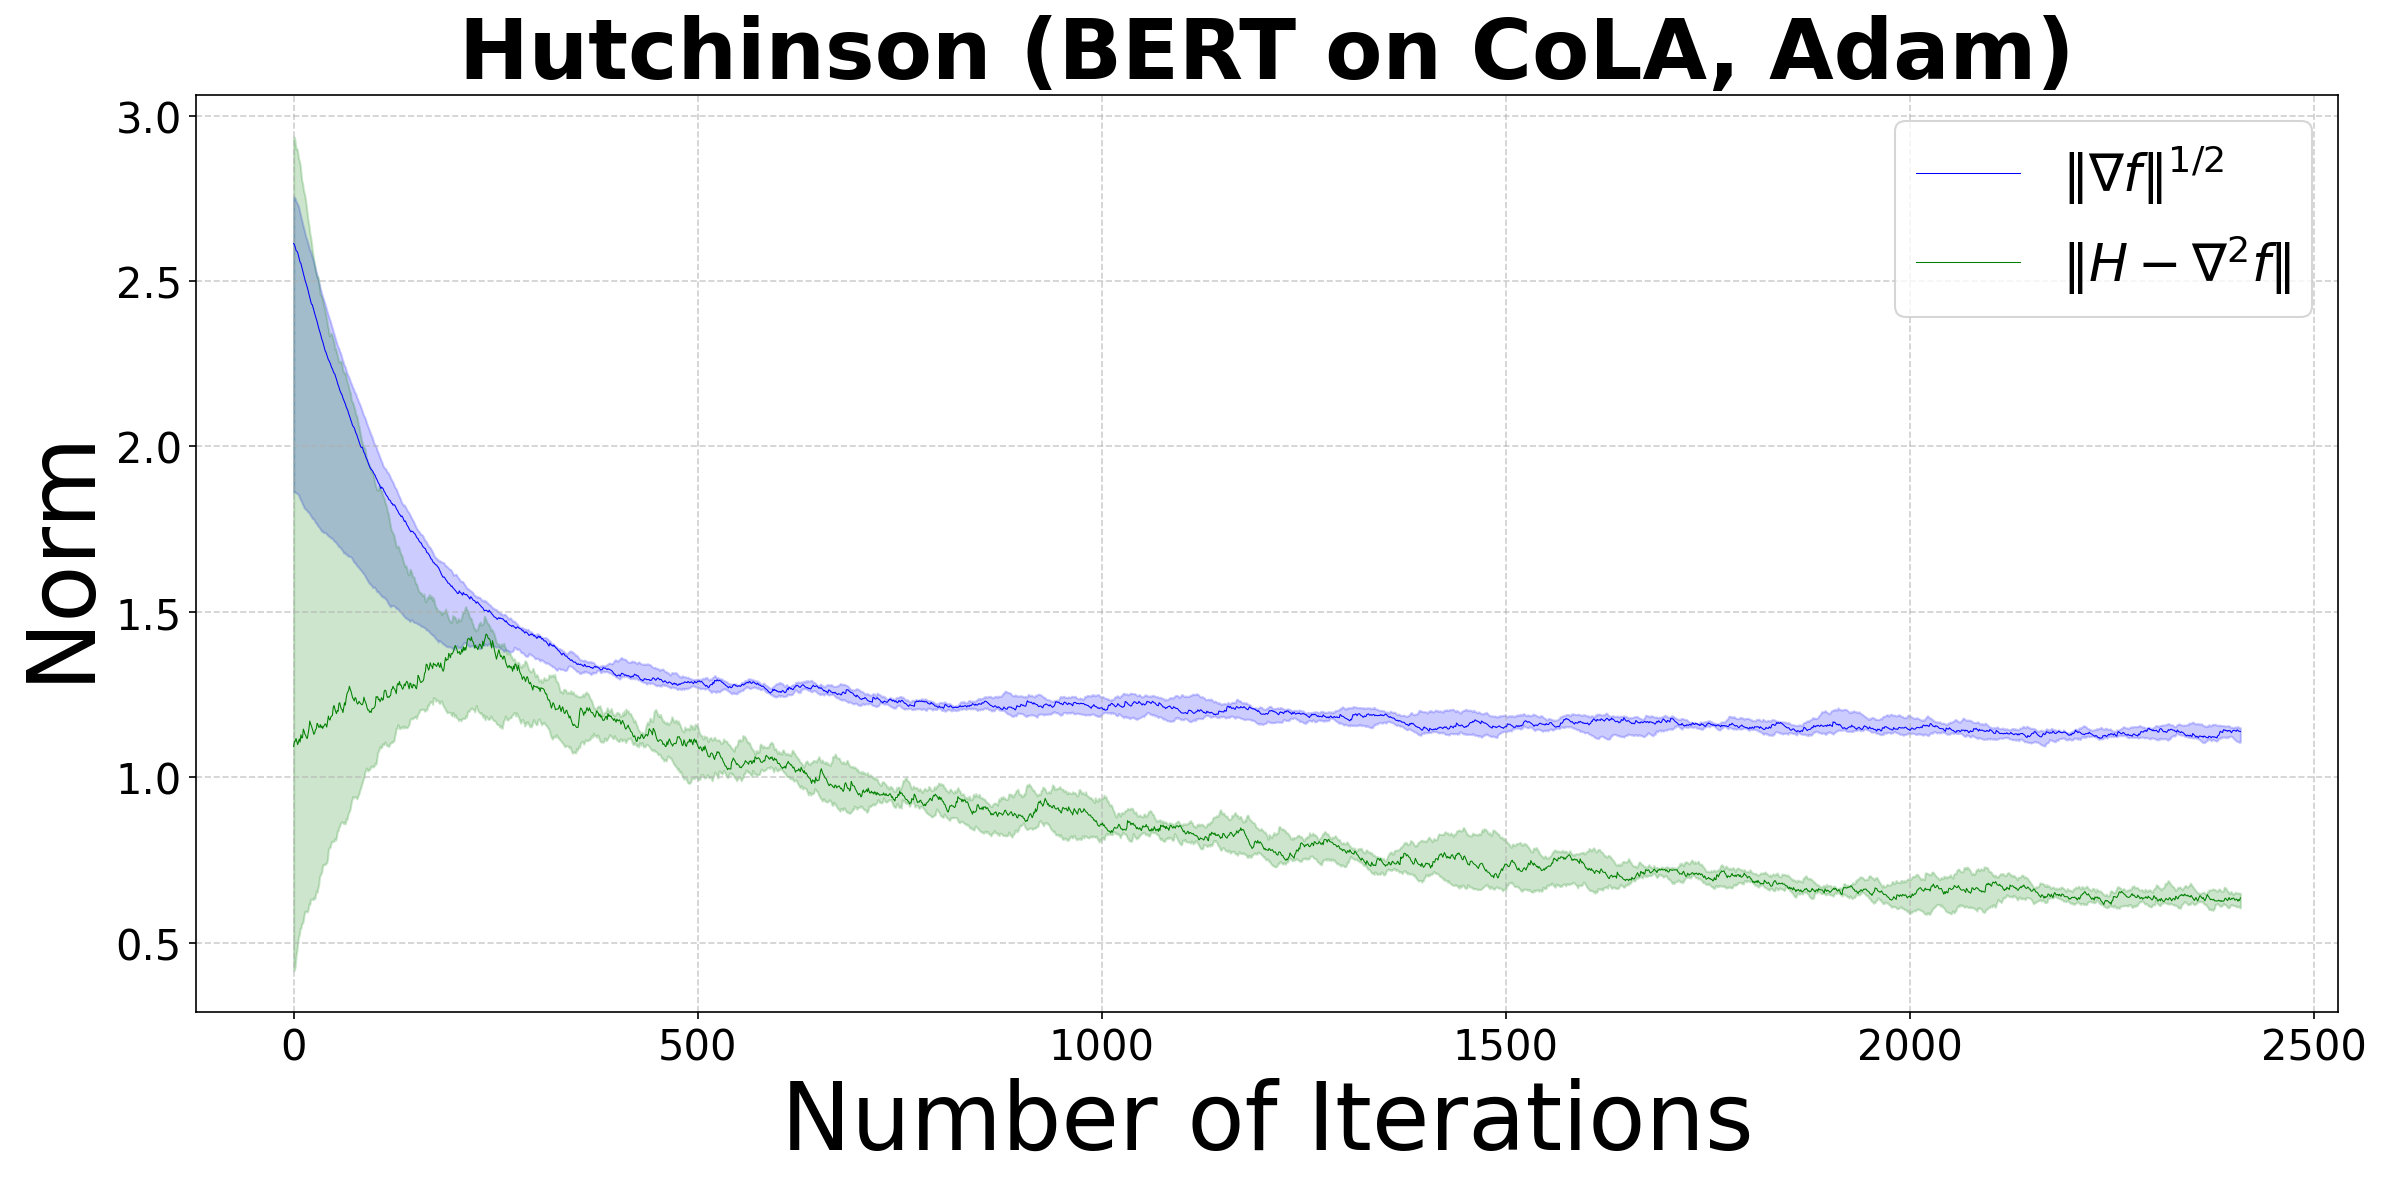

In [31]:
plot_norms(
    'bert_cola_grad_norms.npy', 
    'bert_cola_hutch_norms.npy', 
    'Hutchinson (BERT on CoLA, Adam)',
    M_constant=1 / 60,
    plot_with_percentiles=True,
    logscale=False,
    )

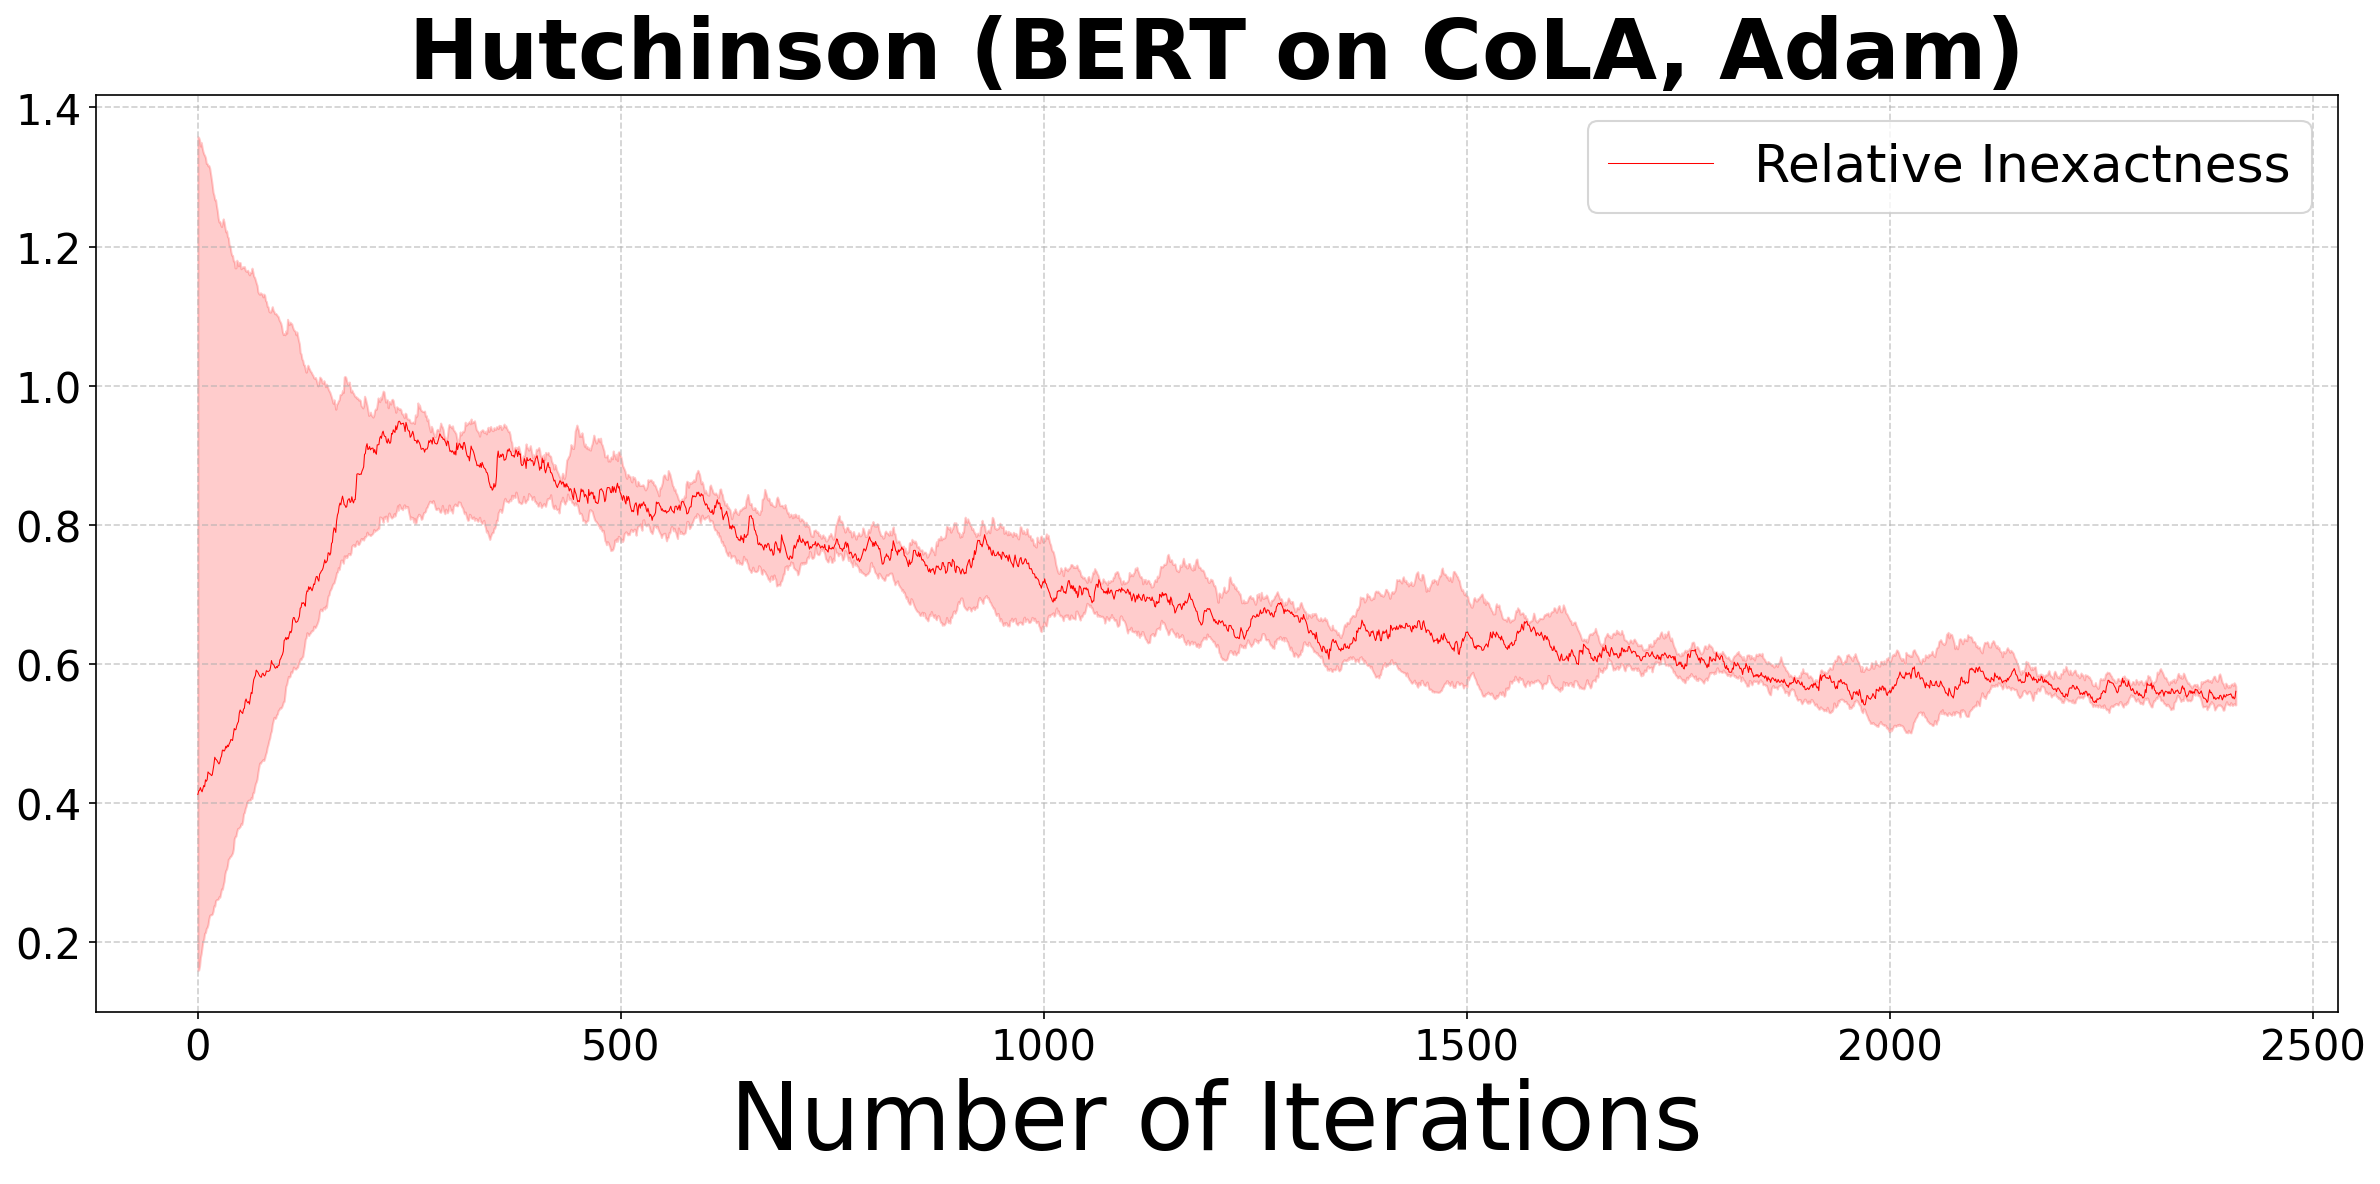

In [39]:
plot_relative_inexactness(
    'bert_cola_grad_norms.npy', 
    'bert_cola_hutch_norms.npy', 
    'Hutchinson (BERT on CoLA, Adam)',
    M_constant=1 / 60,
    plot_with_percentiles=True,
    logscale=False,
    )

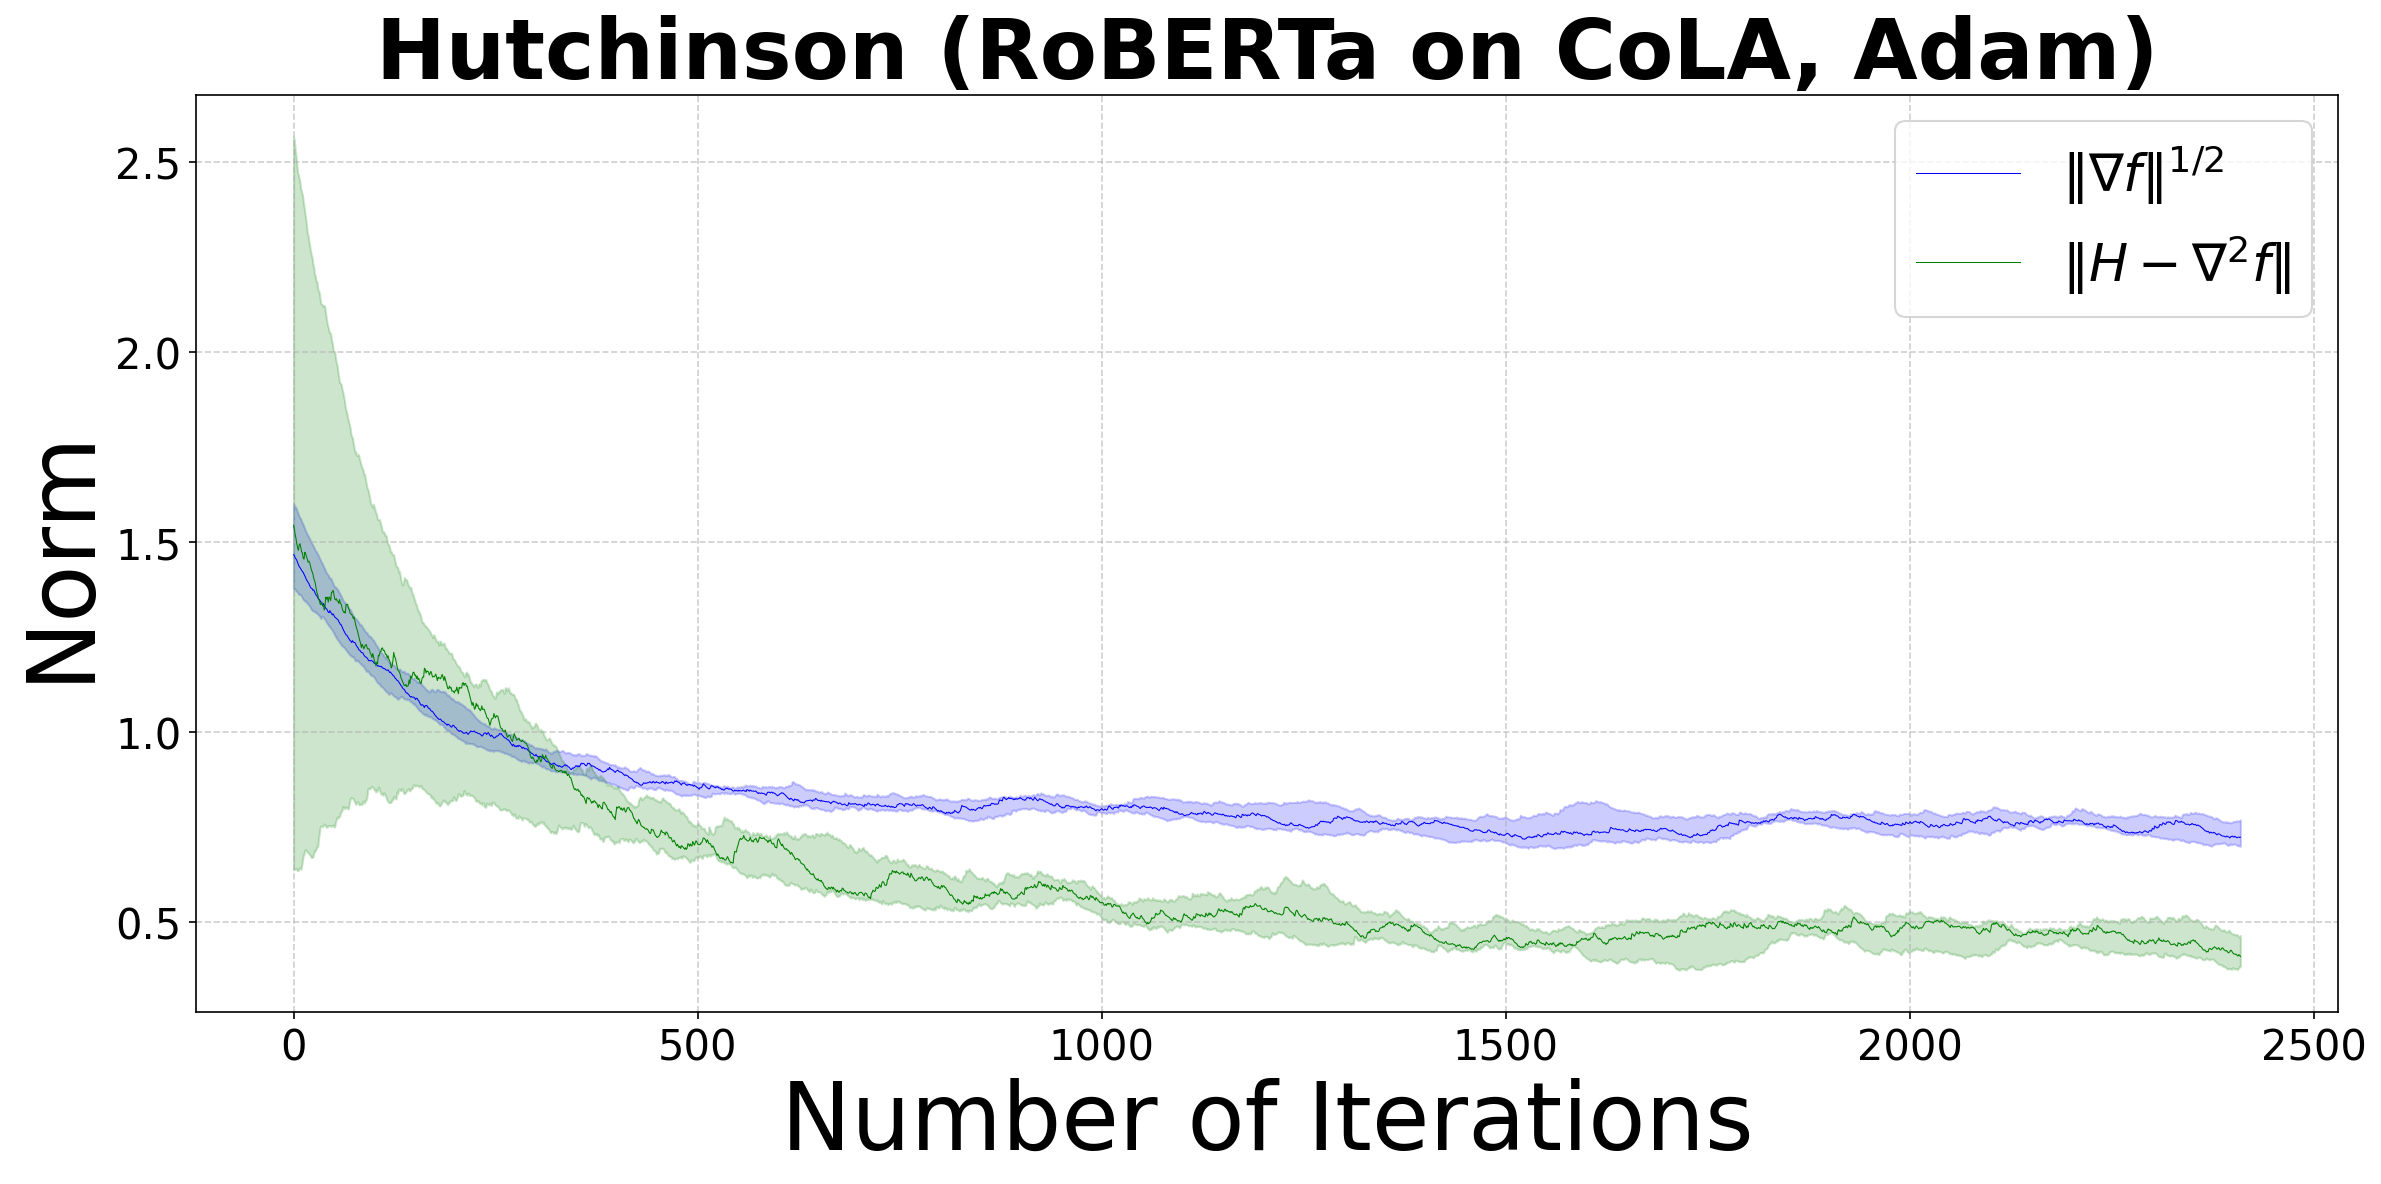

In [42]:
plot_norms(
    'roberta_cola_grad_norms.npy', 
    'roberta_cola_hutch_norms.npy', 
    'Hutchinson (RoBERTa on CoLA, Adam)',
    M_constant=1 / 15,
    plot_with_percentiles=True,
    logscale=False,
    )

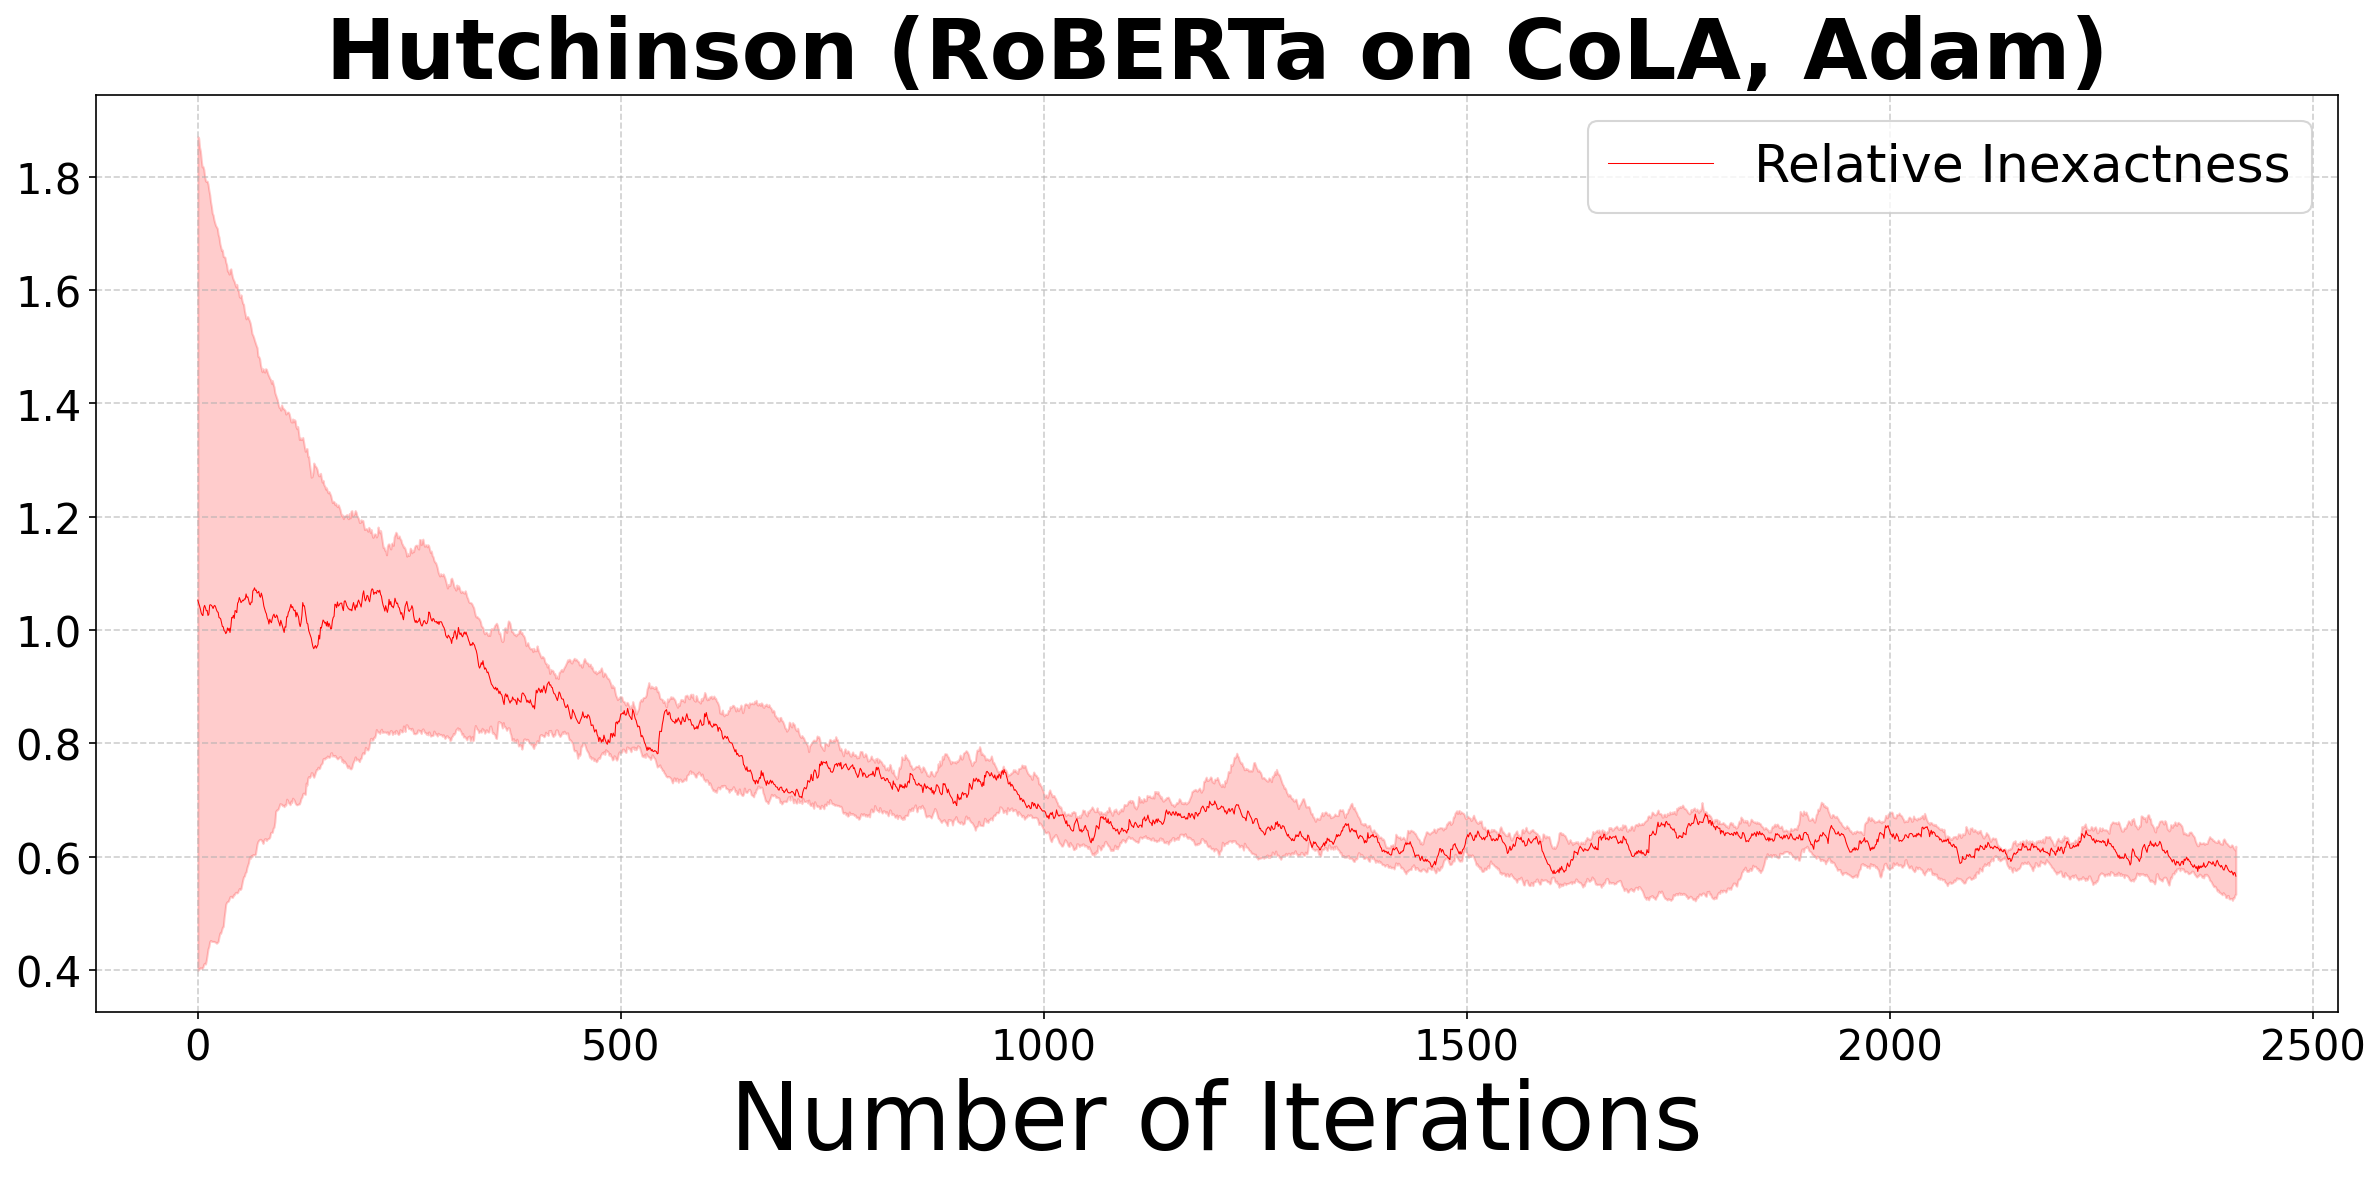

In [43]:
plot_relative_inexactness(
    'roberta_cola_grad_norms.npy', 
    'roberta_cola_hutch_norms.npy', 
    'Hutchinson (RoBERTa on CoLA, Adam)',
    M_constant=1 / 15,
    plot_with_percentiles=True,
    logscale=False,
    )

Fisher

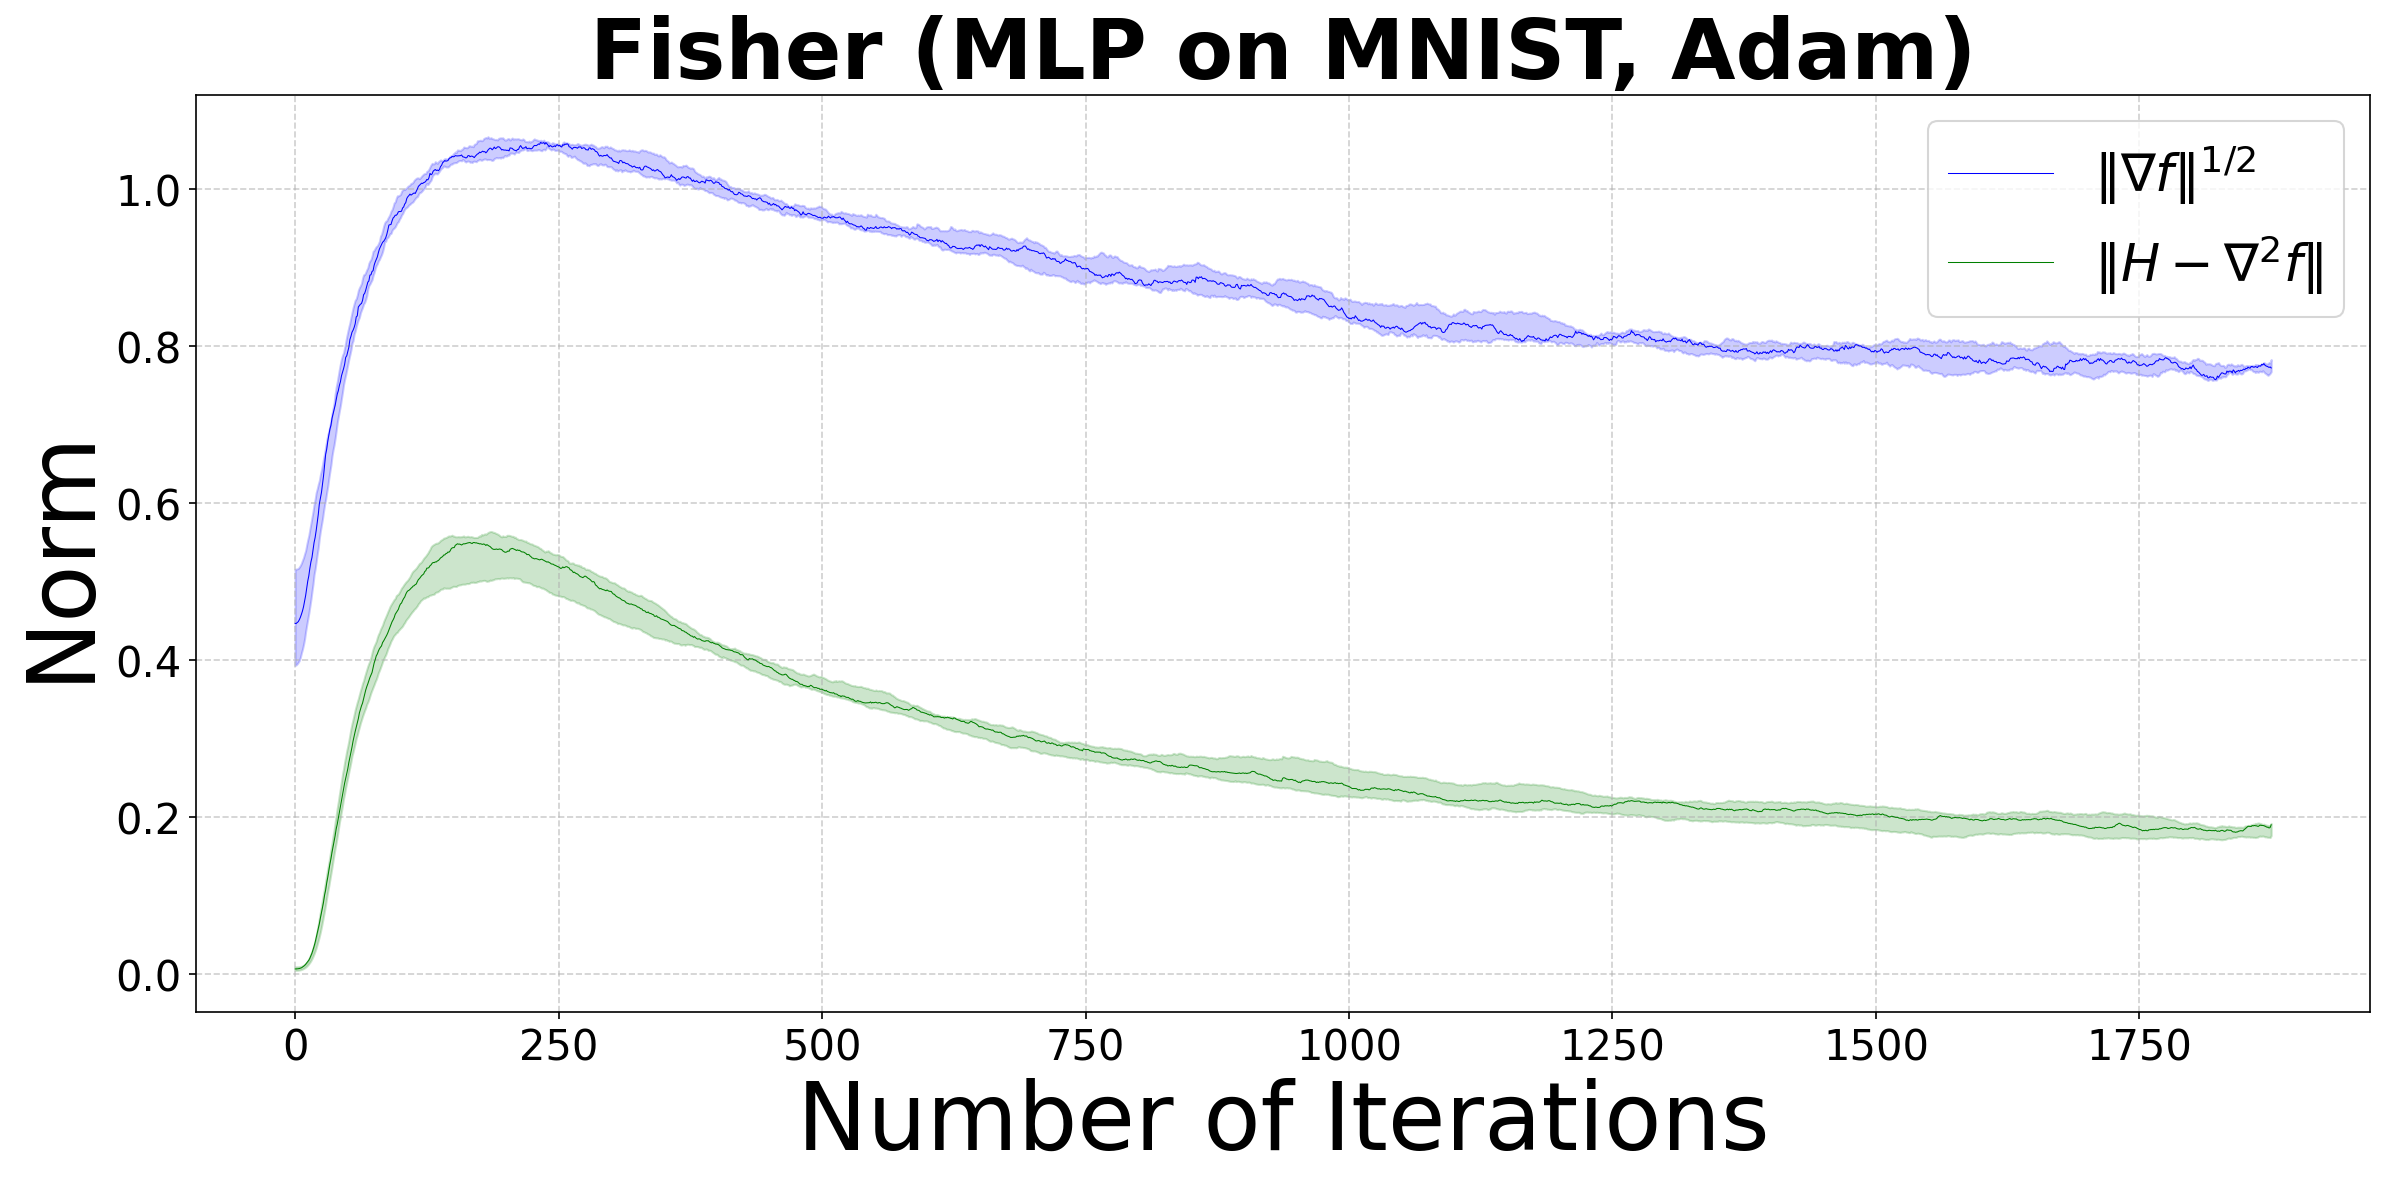

In [20]:
plot_norms(
    'fisher_mnist_grad_norms.npy', 
    'fisher_mnist_hess_norms.npy', 
    'Fisher (MLP on MNIST, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )

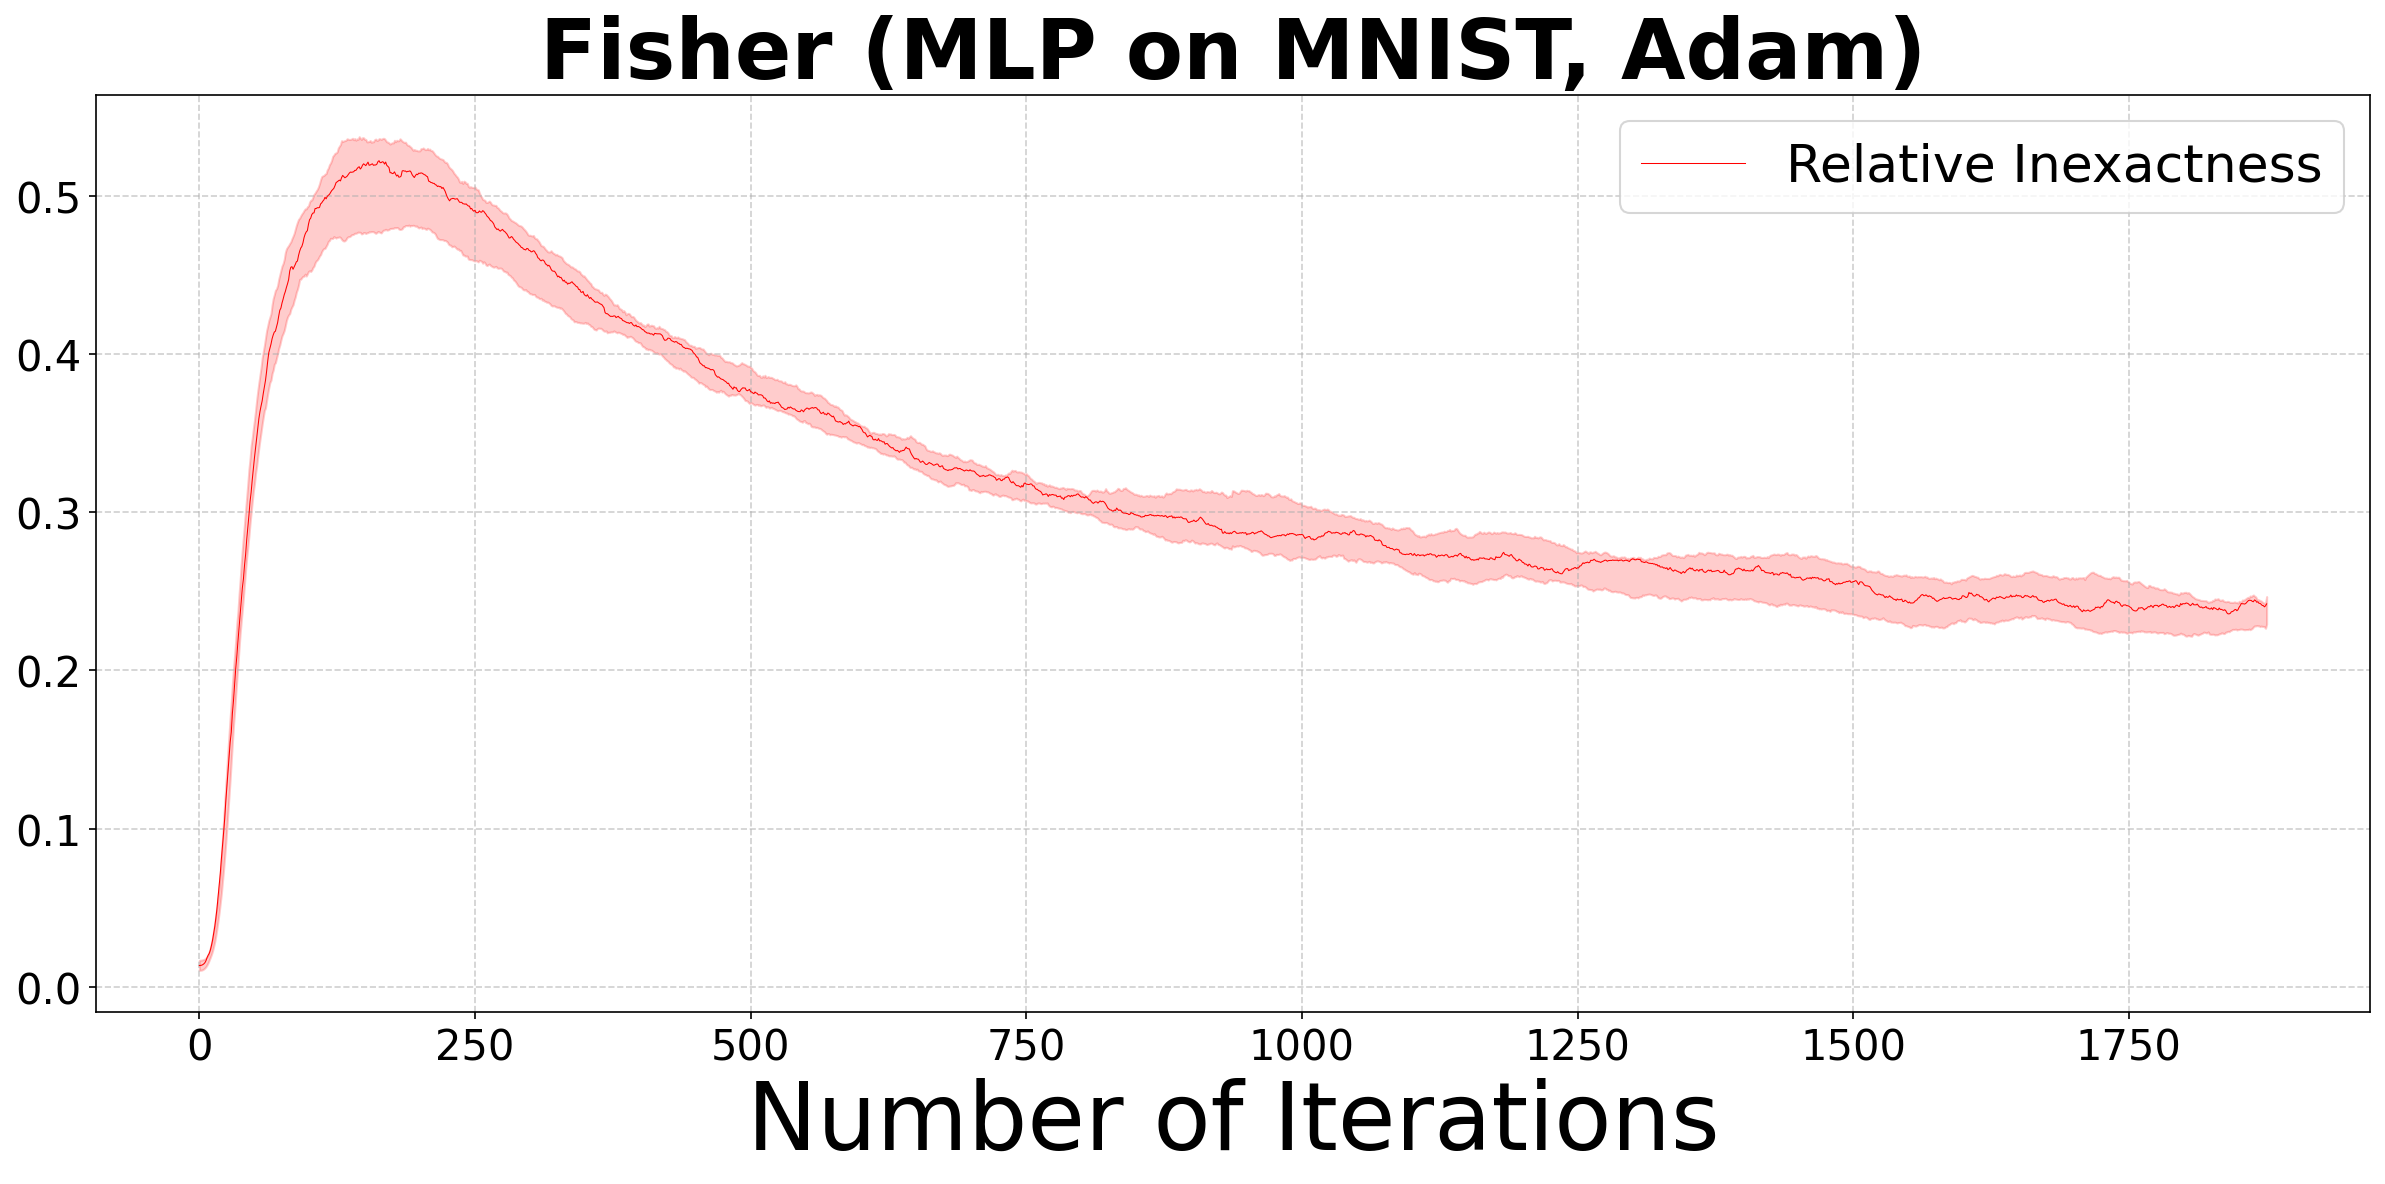

In [21]:
plot_relative_inexactness(
    'fisher_mnist_grad_norms.npy', 
    'fisher_mnist_hess_norms.npy', 
    'Fisher (MLP on MNIST, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )

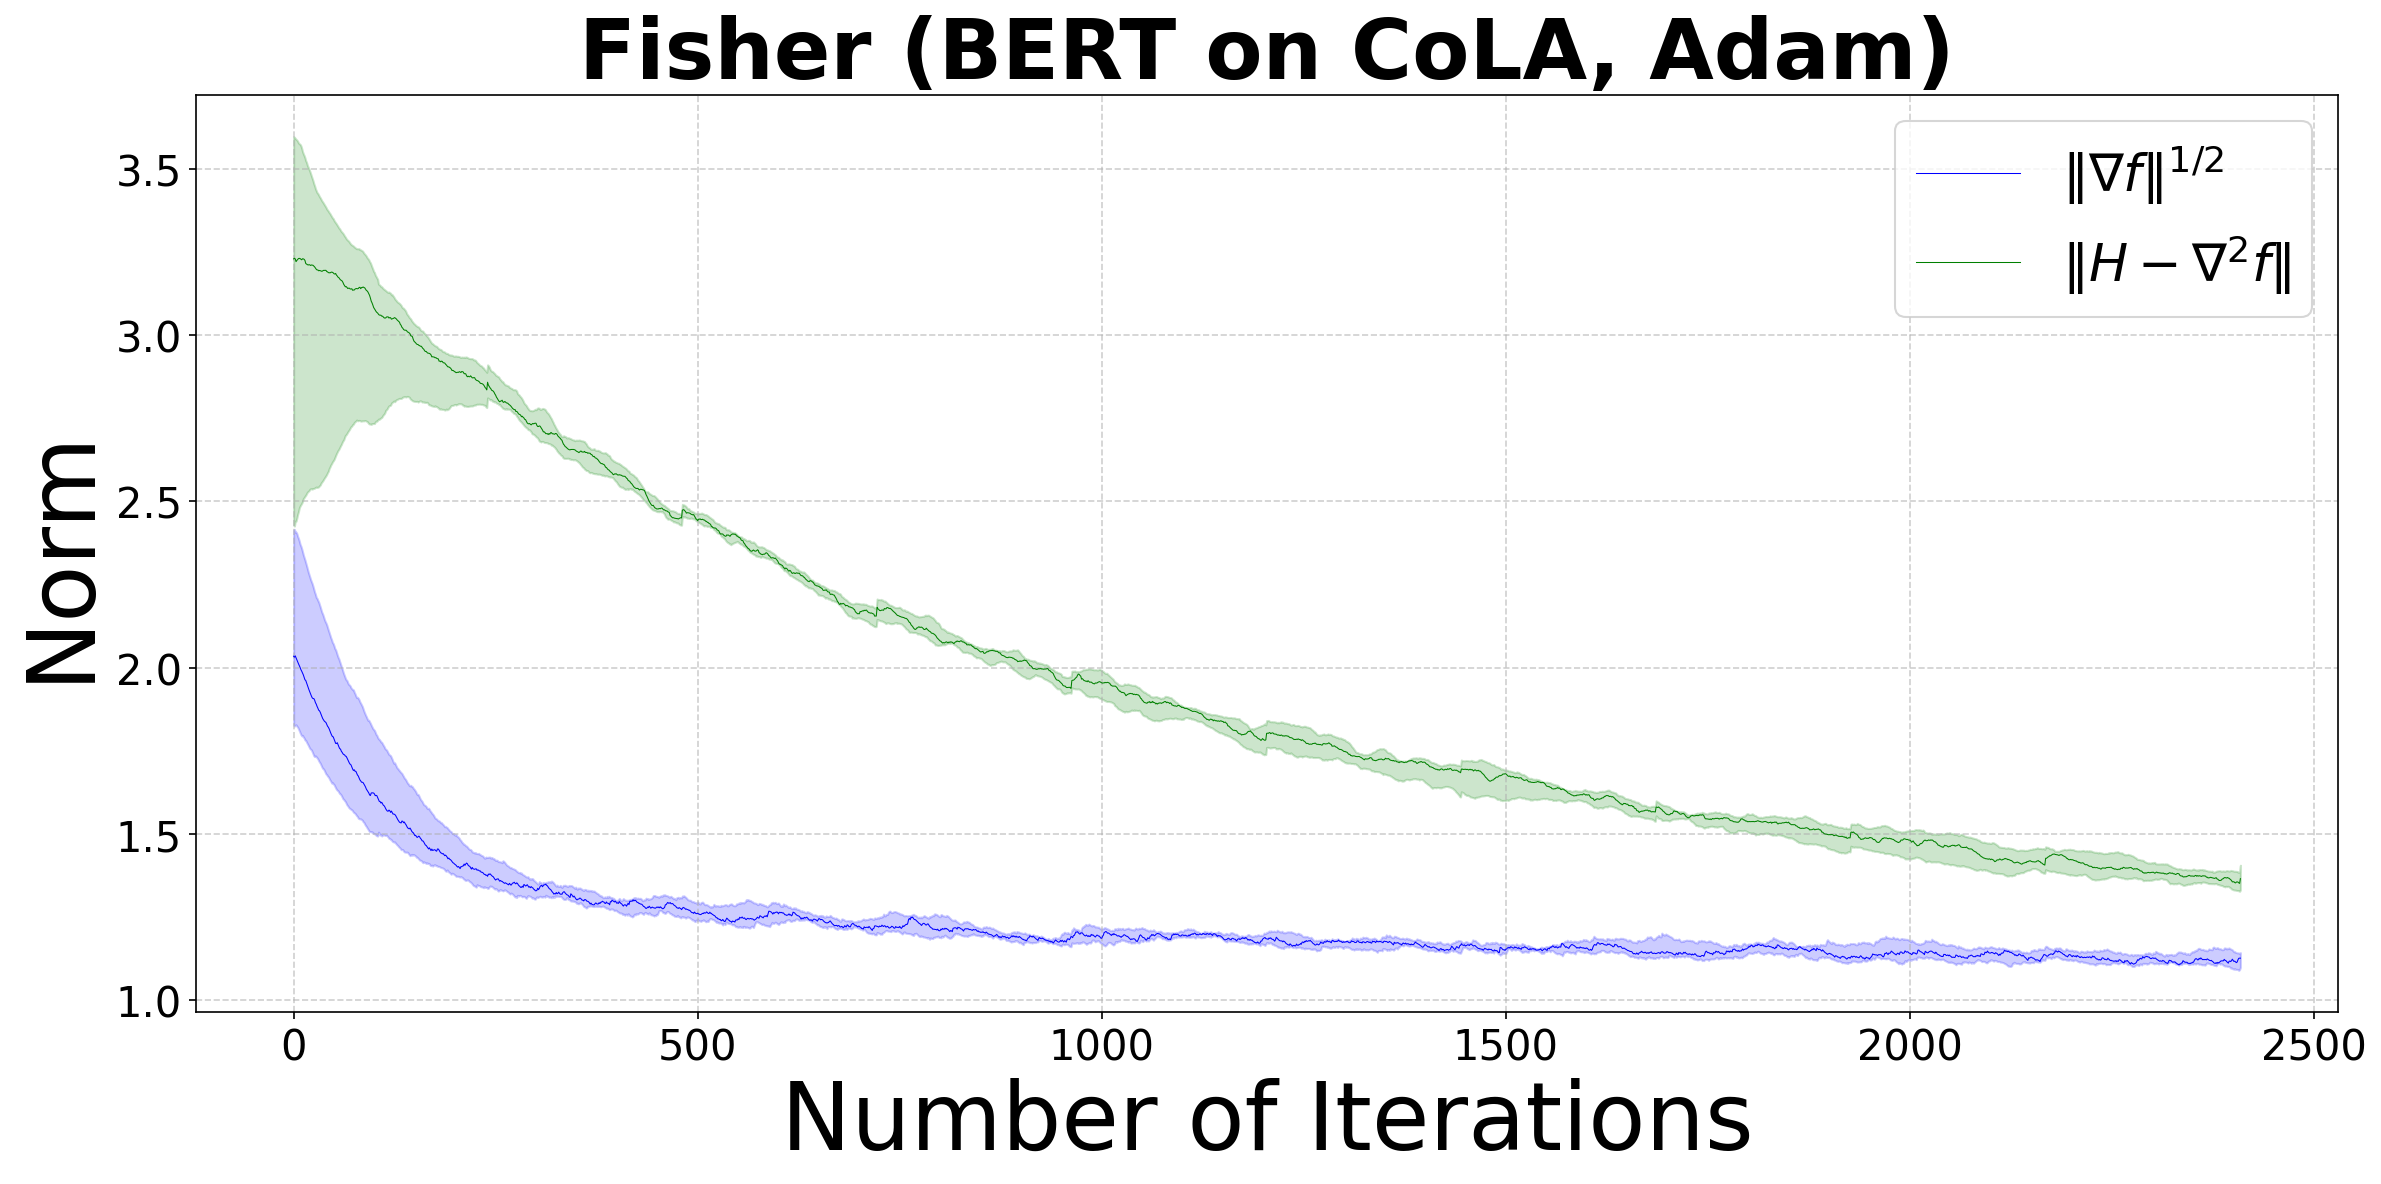

In [22]:
plot_norms(
    'fisher_bert_cola_grad_norms.npy', 
    'fisher_bert_cola_hess_norms.npy', 
    'Fisher (BERT on CoLA, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )

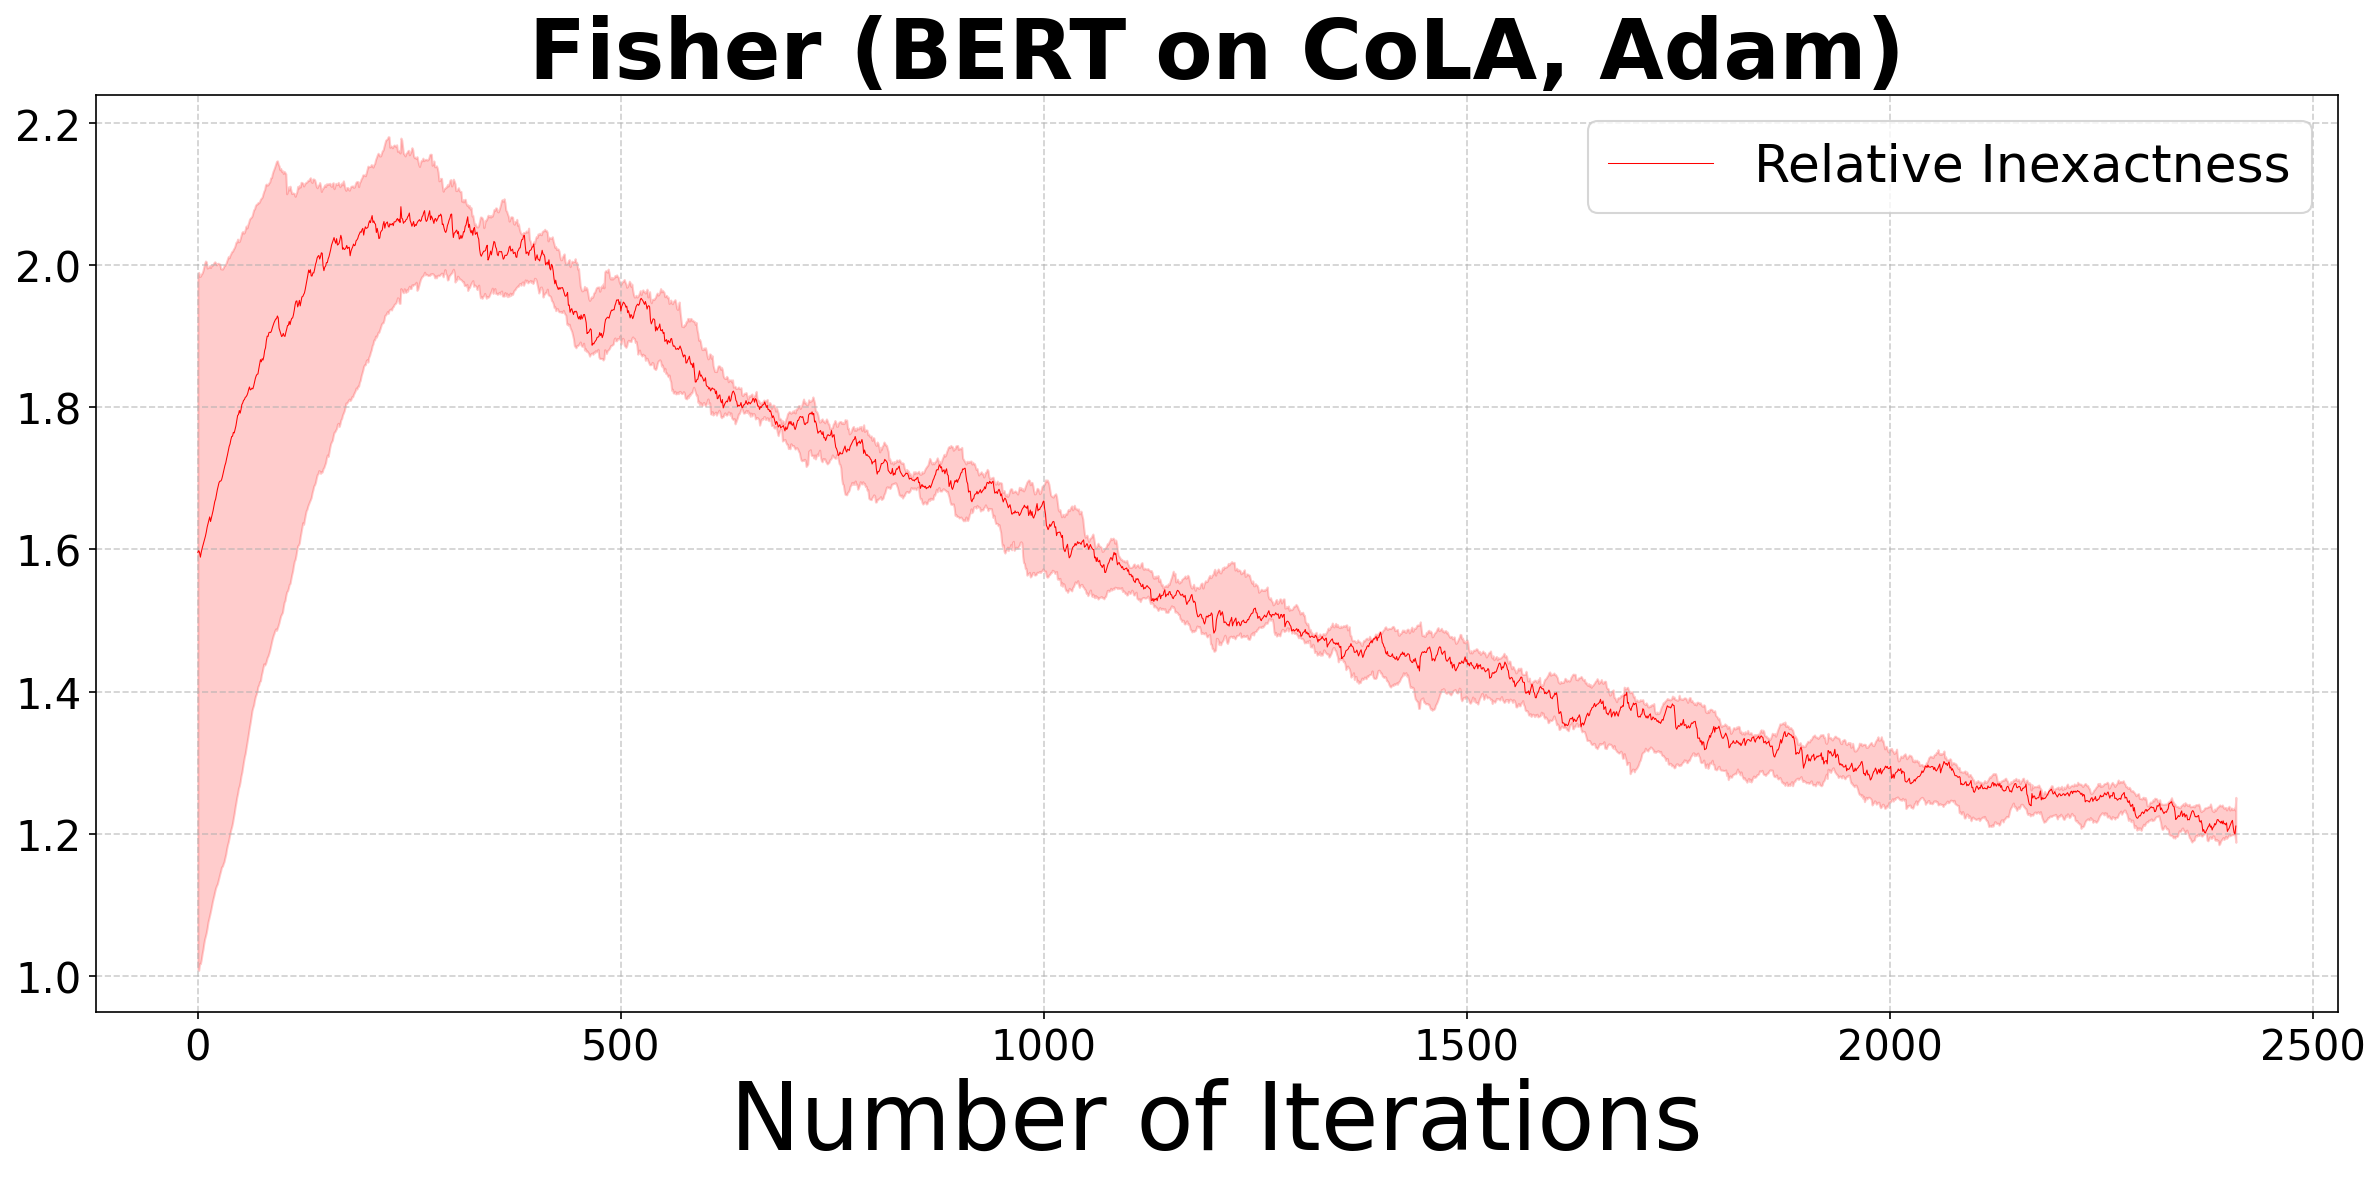

In [23]:
plot_relative_inexactness(
    'fisher_bert_cola_grad_norms.npy', 
    'fisher_bert_cola_hess_norms.npy', 
    'Fisher (BERT on CoLA, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )

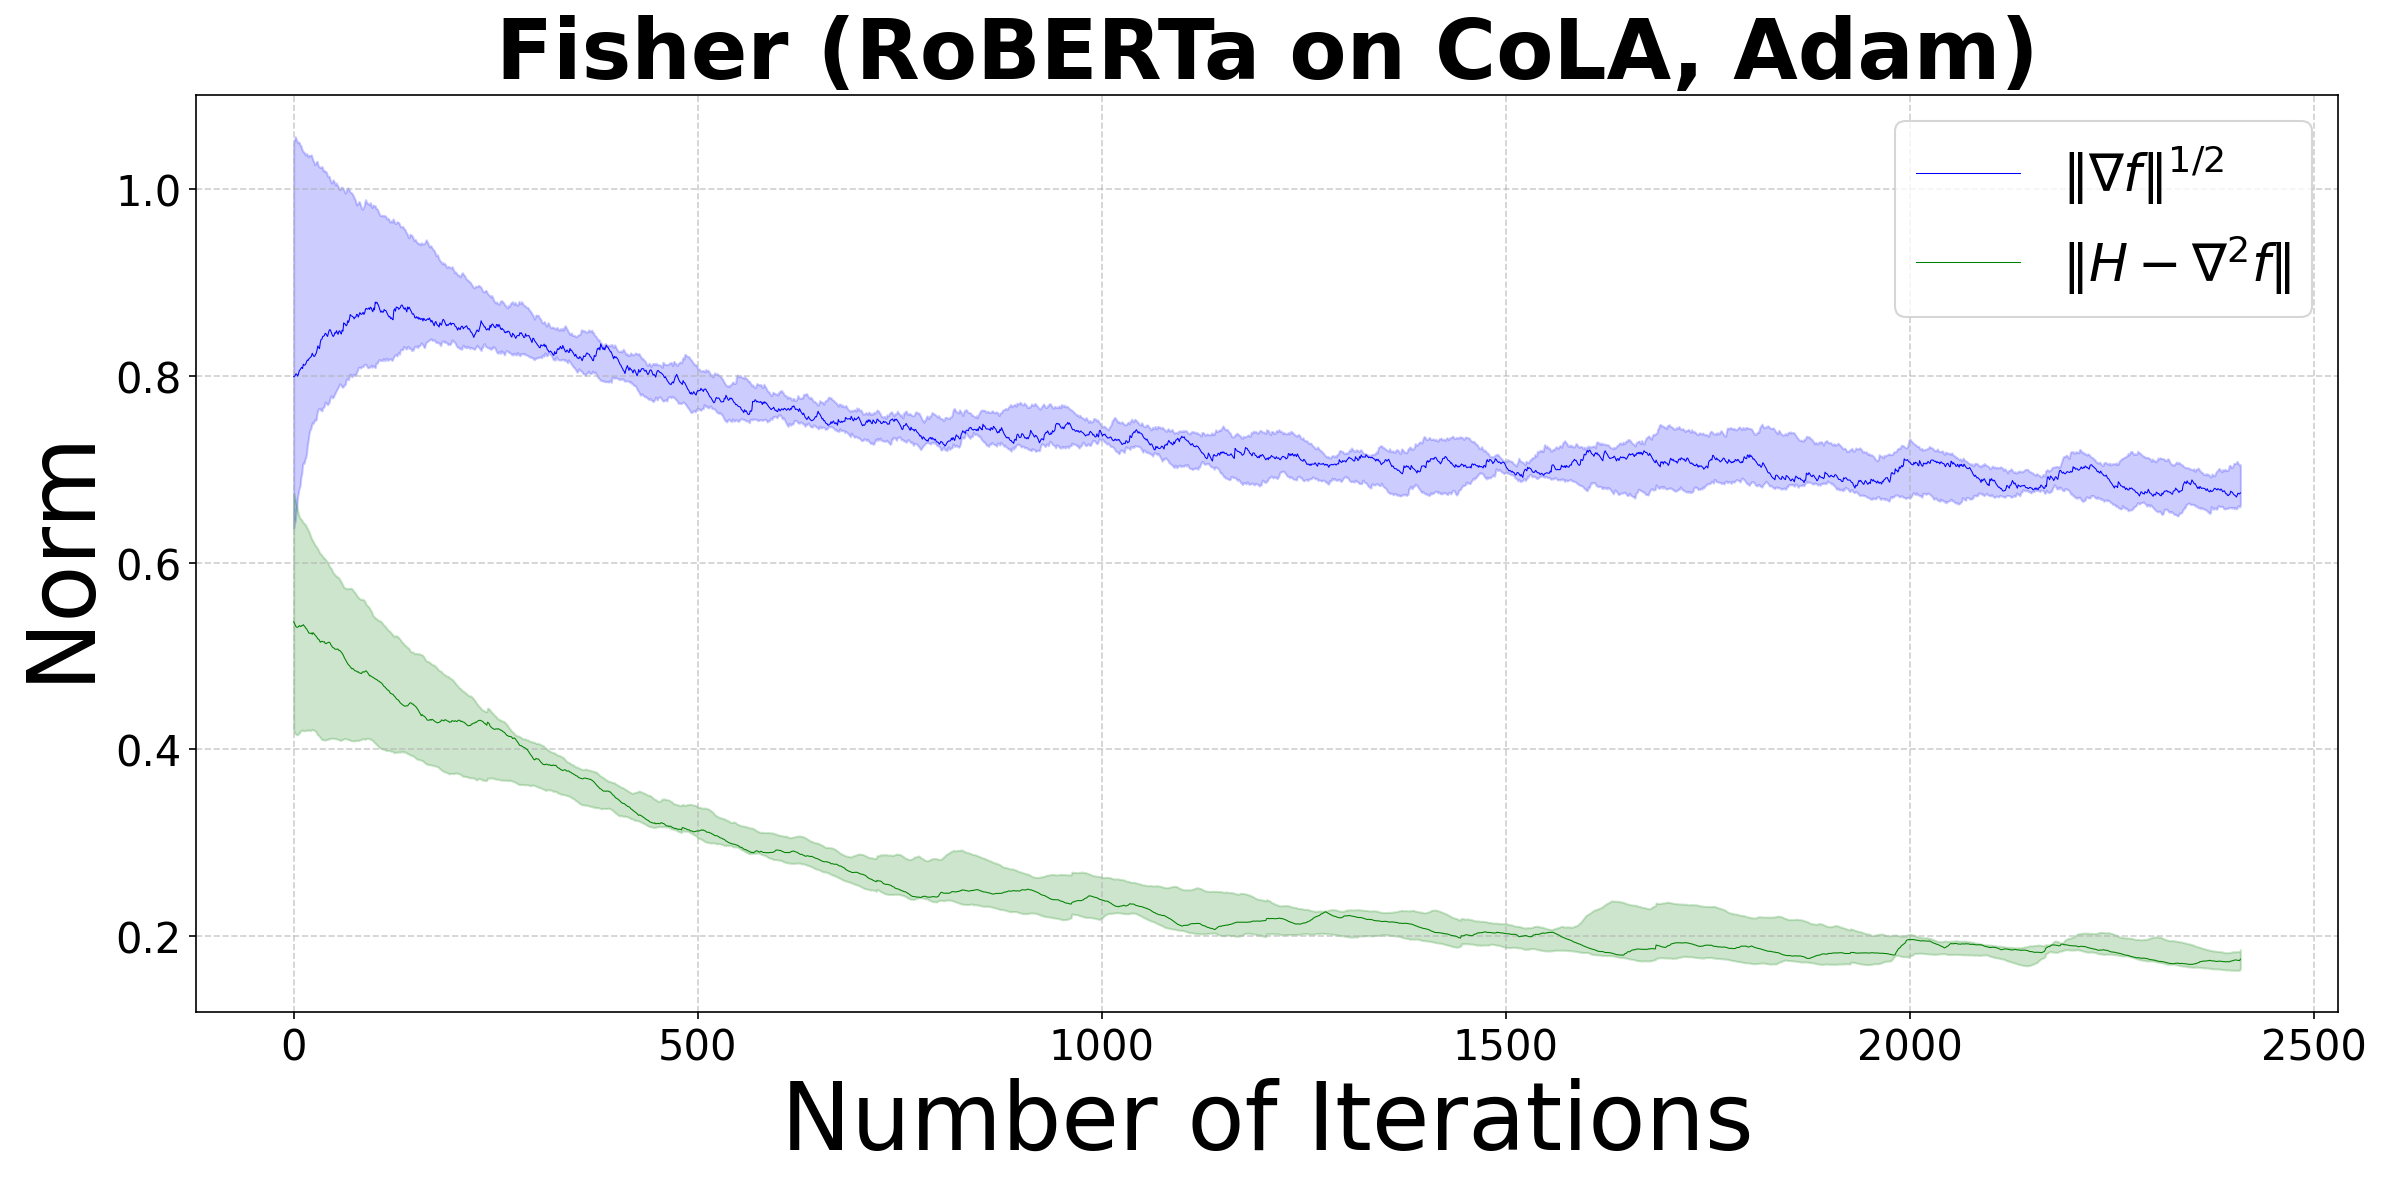

In [24]:
plot_norms(
    'fisher_roberta_cola_grad_norms.npy', 
    'fisher_roberta_cola_hess_norms.npy', 
    'Fisher (RoBERTa on CoLA, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )

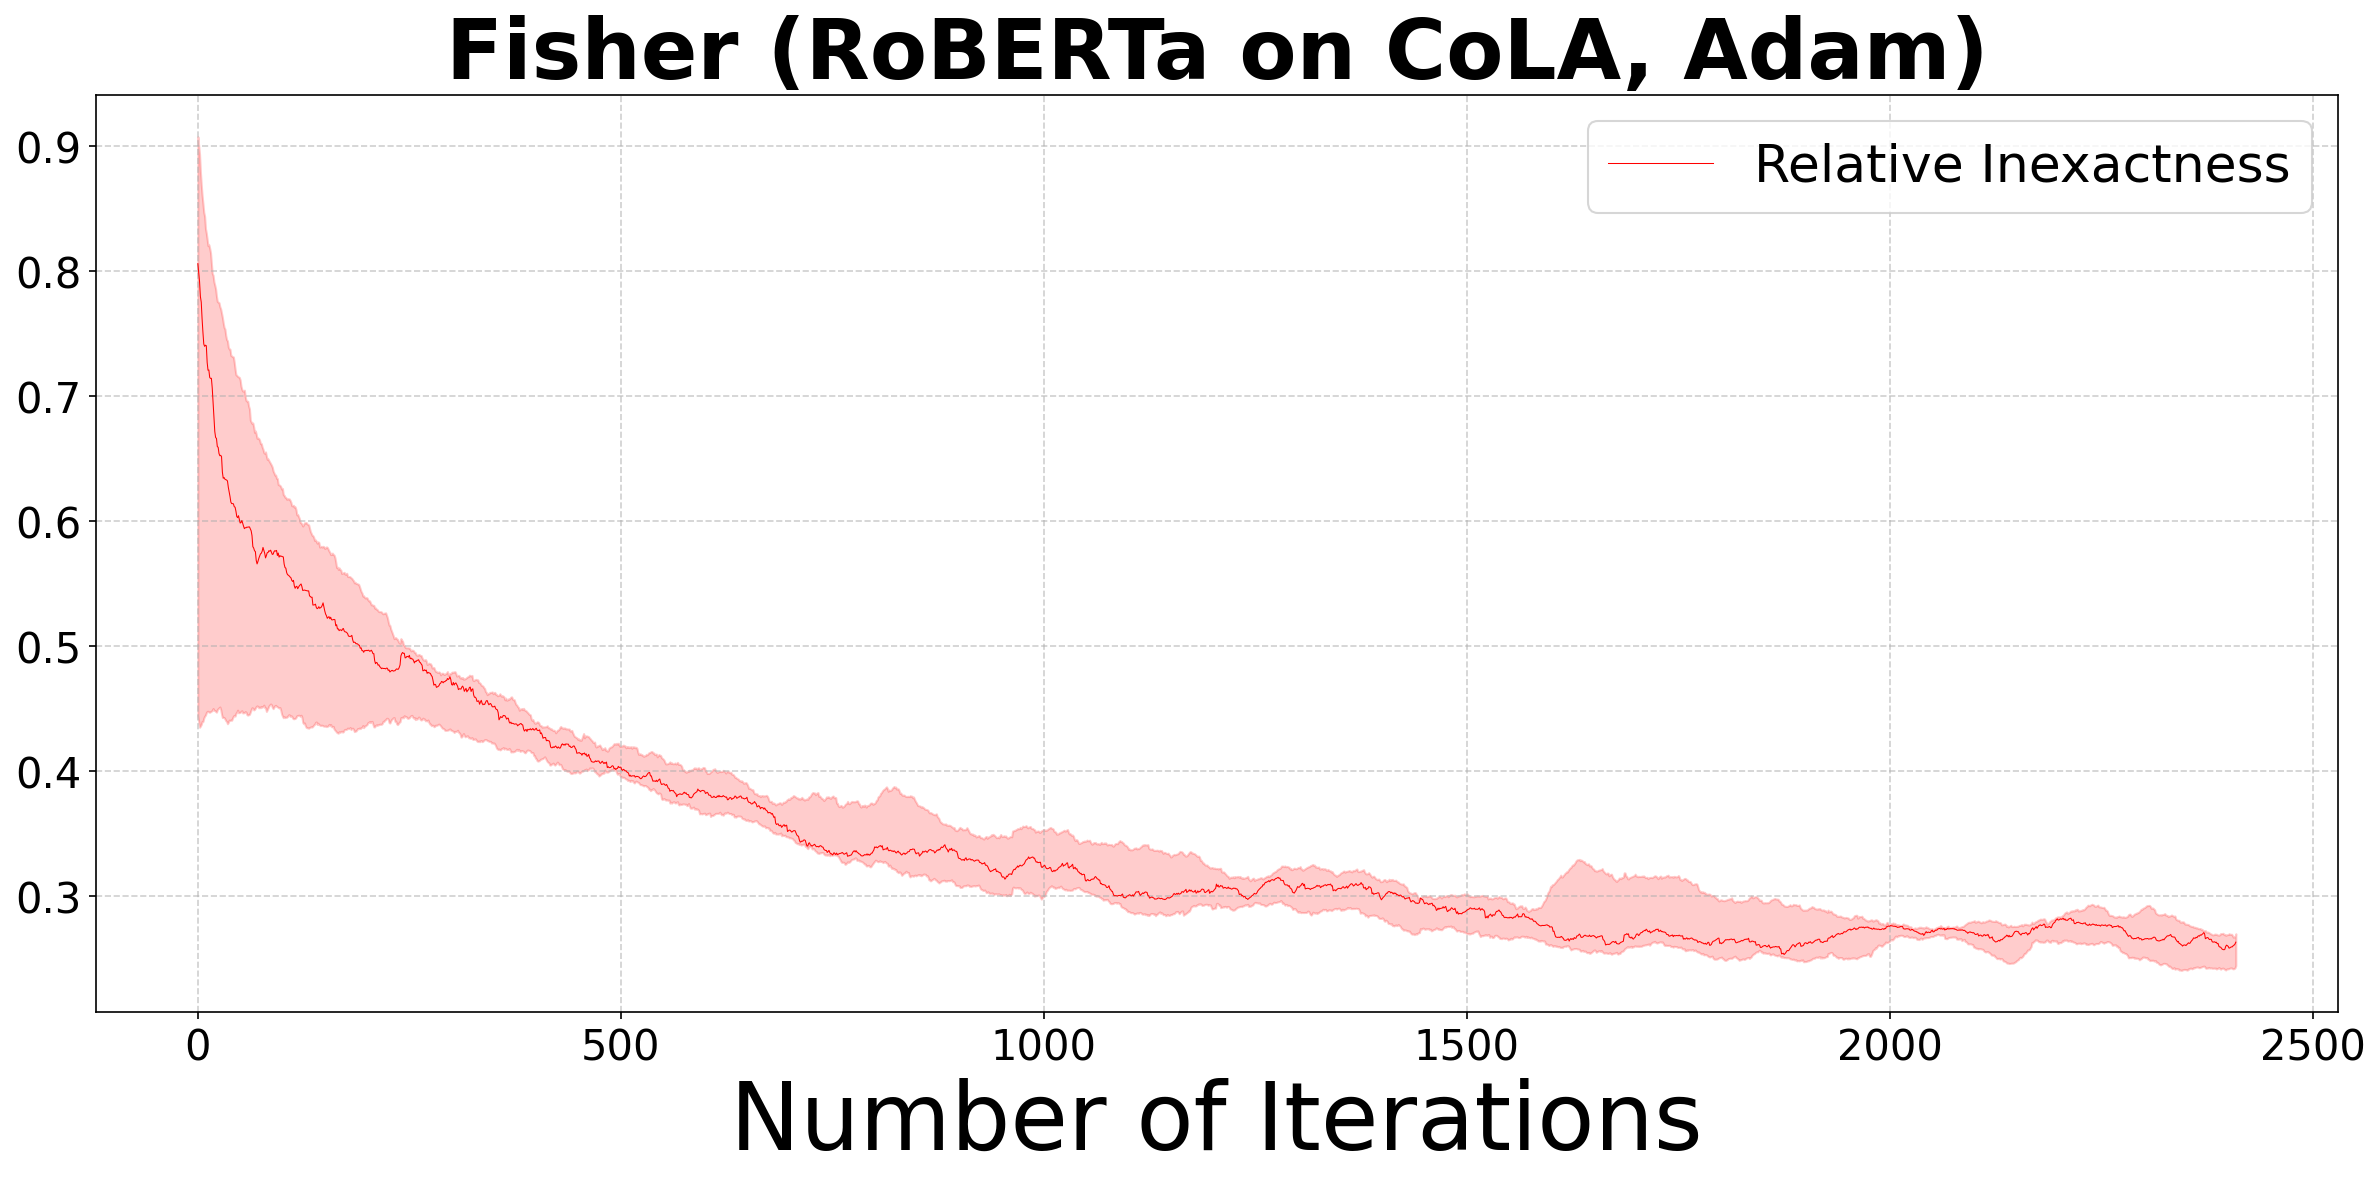

In [25]:
plot_relative_inexactness(
    'fisher_roberta_cola_grad_norms.npy', 
    'fisher_roberta_cola_hess_norms.npy', 
    'Fisher (RoBERTa on CoLA, Adam)',
    M_constant=1,
    plot_with_percentiles=True,
    logscale=False,
    )